# **Step 0 Setting environment**

In this step, we import all the packet and environment we need

Introduce of each package:
We use pandas and numpy for manipulating data. We import scikeras for initializing the LSTM classifier. We also import matplotlib for comparing the result and visualization.

In [ ]:
!pip install scikeras
#Loading the needed packages and installing needed environment
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, mean_squared_error, silhouette_score

from scikeras.wrappers import KerasClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Make the notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)
keras.backend.clear_session()

In [95]:
# the method for drawing picture to compare the performance differnet models.
def plot_model_compare(models, data, type):
    """
    Plots a bar chart of model accuracies.

    Parameters:
    models (list of str): List of model names.
    accuracies (list of float): List of accuracy scores for the models.
    """
    plt.figure(figsize=(10, 6))
    plt.bar(models, data, color=['blue', 'green', 'red'])
    plt.xlabel('Model Type')
    plt.ylabel(type)
    plt.title(type+' of Different Models')
    # Set the limit for y-axis to focus on the differences task more clearly
    if type=="Accuracy":
      plt.ylim(0.7, 0.84)
    elif type=="F1 Score":
      plt.ylim(0.6, 0.71)
    elif type=="precision":
      plt.ylim(0.6, 0.74)
    elif type=="recall":
      plt.ylim(0.6, 0.71)
    elif type=="Training Time":
      plt.ylim(60, 180)
    else:
      plt.ylim(0,2.5)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# **Step 1 Data loading**

We load the train set and test set of emnist in this step.

In [ ]:
# Load the train set
file_path = './emnist_train.pkl'

# Open and load the pickled dataset
with open(file_path, 'rb') as f:
    dataset = pickle.load(f)

# Display the basic structure of the dataset
dataset
# Extract features and labels from the dictionary
features = dataset['data']
labels = dataset['labels']

# Display the shape of features and labels, and the first few entries of each
features.shape, labels.shape, features[:5], labels[:5]


((100000, 28, 28),
 (100000,),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0

In [ ]:
# Load the train dataset
file_path = './emnist_test.pkl'

# Open and load the pickled dataset
with open(file_path, 'rb') as f:
    dataset = pickle.load(f)

# Extract features and labels from the dictionary
features_test = dataset['data']
labels_test = dataset['labels']

Train data shape: (100000, 28, 28)
Train label shape: (100000,)
Missing values in X_train: 0
Missing values in y_train: 0
Missing values in X_test: 0
Missing values in y_test: 0
Unique labels in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


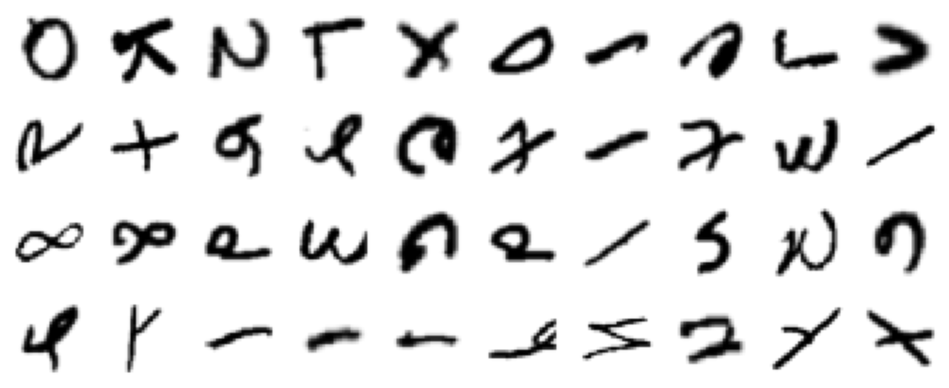

In [ ]:
# For model3
# load EMNIST data set
with open('./emnist_train.pkl', 'rb') as f:
    train_data = pickle.load(f)

with open('./emnist_test.pkl', 'rb') as f:
    test_data = pickle.load(f)


# split data set
MLP_X_train_full, MLP_y_train_full = train_data['data'], train_data['labels']
MLP_X_test, MLP_y_test = test_data['data'], test_data['labels']

# get basic info about data set
print("Train data shape:", MLP_X_train_full.shape)
print("Train label shape:", MLP_y_train_full.shape)

print("Missing values in X_train:", np.isnan(MLP_X_train_full).sum())
print("Missing values in y_train:", np.isnan(MLP_y_train_full).sum())
print("Missing values in X_test:", np.isnan(MLP_X_test).sum())
print("Missing values in y_test:", np.isnan(MLP_y_test).sum())
print("Unique labels in y_train:", np.unique(MLP_y_train_full))

def plot_examples(data, n_rows=4, n_cols=10):
    """Plot a grid of MNIST examples of a specified size."""

    # Size figure depending on the size of the grid
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

    for row in range(n_rows):
        for col in range(n_cols):

            # Get next index of image
            index = n_cols * row + col

            # Plot the image at appropriate place in grid
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(data[index], cmap="binary")
            plt.axis('off')

    plt.show()

plot_examples(MLP_X_train_full)

# **Step 2 Data preprocessing**

We use 3 different ways for data preprocessing, 1 is LSTM, 2 is CNN, and 3 is MLP  

In [ ]:
#Model1
# pre_processing train data
# Normalize pixel values to be between 0 and 1
features_normalized = features.astype('float32') / 255.0
# Reshape for LSTM input (batch, timesteps, features_per_timestep)
features_reshaped = features_normalized.reshape(features_normalized.shape[0], 28, 28)
# One-hot encode the labels
labels_categorical = to_categorical(labels)
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features_reshaped, labels_categorical, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

# pre_processing test data
# Normalize pixel values to be between 0 and 1
features_normalized_test = features_test.astype('float32') / 255.0
# Reshape for LSTM input (batch, timesteps, features_per_timestep)
features_reshaped_test = features_normalized_test.reshape(features_normalized_test.shape[0], 28, 28)
# One-hot encode the labels
labels_categorical_test = to_categorical(labels_test)

Shape of X_train2: (90000, 28, 28)


In [ ]:
#Model2
# Split data into training and validation sets
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(features, labels, train_size=0.9)

In [ ]:
#Model3
# Normalization to avoid gradient close to 0
MLP_X_train_full = MLP_X_train_full.astype('float32') / 255.0
MLP_X_test = MLP_X_test.astype('float32') / 255.0

# Split data into training and validation sets
MLP_X_train, X_valid, MLP_y_train, MLP_y_valid = train_test_split(MLP_X_train_full, MLP_y_train_full, train_size=0.9)

# **Step 3 Implement the model**

## **Model1**

Here we create LSTM model

In [ ]:
# create the LSTM model, we choose LSTM layer, dropout layer and dense layer to build it.
def create_model(n_units=128, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        LSTM(n_units, input_shape=(28, 28), return_sequences=True),
        Dropout(dropout_rate),
        LSTM(n_units // 2),
        Dense(n_units // 2, activation='relu'),
        Dense(62, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model)

In [ ]:
#Train LSTM model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5171 - loss: 1.8395 - val_accuracy: 0.7604 - val_loss: 0.7497
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7791 - loss: 0.6792 - val_accuracy: 0.8071 - val_loss: 0.5823
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8102 - loss: 0.5638 - val_accuracy: 0.8163 - val_loss: 0.5361
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8279 - loss: 0.4954 - val_accuracy: 0.8285 - val_loss: 0.4926
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8376 - loss: 0.4593 - val_accuracy: 0.8329 - val_loss: 0.4732
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8476 - loss: 0.4231 - val_accuracy: 0.8364 - val_loss: 0.4683
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8527 - loss: 0.4030 - val_accuracy: 0.8364 - val_loss: 0.4634
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8549 - loss: 0

KerasClassifier(
	model=<function create_model at 0x7c54e0498310>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[53 18 12]


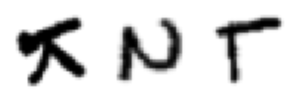

In [25]:
# implementaion of LSTM
# Sample several test examples
features_sample = features[1:4]

# Get probability of each class from model
y_proba_1 = model.predict(features_sample)
y_pred_1 = np.argmax(y_proba_1, axis=-1)
print(y_pred_1)

# Show 3 sampled examples of dataset
plot_examples(features[1:4], n_rows=1, n_cols=3)

## **Model2**

Here we create CNN model

In [ ]:
# TODO: Define helper function (e.g. plotting) if applicable

def plot_examples(data, n_rows=4, n_cols=10):
    """Plot a grid of images which are encoded as numpy arrays."""

    # Remove redundant extra dimension
    if data.shape[-1] == 1:
        data = data.squeeze(axis=-1)


    # Size figure depending on the size of the grid
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

    for row in range(n_rows):
        for col in range(n_cols):

            # Get next index of image
            index = n_cols * row + col

            # Plot the image at appropriate place in grid
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(data[index], cmap="binary")
            plt.axis('off')

    plt.show()
# Define model constructor for CNN model
def create_model2(optimizer='adam', dropout_rate=0.5):
    model = keras.Sequential([
        keras.layers.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="softmax"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="softmax"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(62, activation="softmax")
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# The function helps draw plot for estimation of each model
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# TODO: Implement model 2
model2 = keras.Sequential([

    # Specify the input shape, including the channel dimension
    keras.Input(shape=(28, 28, 1)),

    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="softmax"),#relu
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="softmax"),#relu
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(62, activation="softmax"),
])

model2.summary()

# Compile model with loss, optimiser, and metrics
opt = keras.optimizers.Adam(learning_rate=0.01)
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])
#loss='sparse_categorical_crossentropy',

"""Running this cell could take several minutes"""

# Train the model for 10 epochs with batch size 128
batch_size = 128
epochs = 15
history = model2.fit(X_train2, y_train2, batch_size=batch_size,
                     epochs=epochs, validation_data=(X_valid2, y_valid2))

# Evaluate the classifier on the test data.
loss, accuracy = model2.evaluate(features_test, labels_test)
print(f"Accuracy on test data: {accuracy:.4f}")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 62)                  │          99,262 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,078 (461.24 KB)

 Trainable params: 118,078 (461.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6020 - loss: 1.5052 - val_accuracy: 0.8135 - val_loss: 0.5693
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7843 - loss: 0.6657 - val_accuracy: 0.8205 - val_loss: 0.5272
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7970 - loss: 0.6171 - val_accuracy: 0.8237 - val_loss: 0.5149
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8021 - loss: 0.5852 - val_accuracy: 0.8292 - val_loss: 0.5088
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8071 - loss: 0.5764 - val_accuracy: 0.8313 - val_loss: 0.4984
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8076 - loss: 0.5614 - val_accuracy: 0.8346 - val_loss: 0.5012
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8128 - loss: 0.5492 - val_accuracy: 0.8341 - val_loss: 0.4977
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8173 - loss: 0.5310 - val_accuracy: 0.

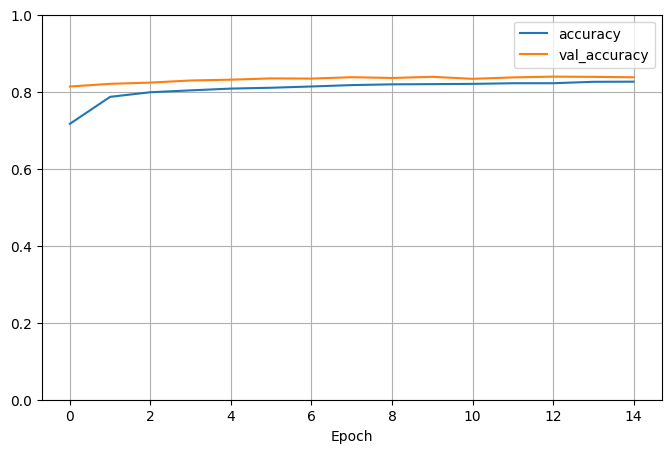

In [ ]:
# Convert the history dictionary to a Pandas dataframe and extract the accuracies
accuracies = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]

# Plot the accuracies
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
[53 59  0]


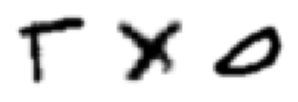

In [ ]:
# Sample several test examples
features_sample = features[3:6]

# Get probability of each class from model
y_proba = model2.predict(features_sample)
y_pred = np.argmax(y_proba, axis=-1)
print(y_pred)

# Show 3 sampled examples of dataset
plot_examples(features[3:], n_rows=1, n_cols=3)

## **Model3**

We create MLP here

In [ ]:
# Define our MLP layer by layer
def get_model(n_units_1=784, n_units_2=392,optimizer = 'adam', activation = 'tanh', learning_rate = 5e-2):
  model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(n_units_1, activation=activation),
    keras.layers.Dense(n_units_2, activation=activation),
    keras.layers.Dense(62, activation="softmax")
  ])
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
  return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 62)                  │          24,366 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 947,526 (3.61 MB)

 Trainable params: 947,526 (3.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6128 - loss: 1.4826 - val_accuracy: 0.7391 - val_loss: 0.8938
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7479 - loss: 0.8462 - val_accuracy: 0.7741 - val_loss: 0.7471
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7814 - loss: 0.7039 - val_accuracy: 0.7889 - val_loss: 0.6752
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7999 - loss: 0.6248 - val_accuracy: 0.7979 - val_loss: 0.6322
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8125 - loss: 0.5720 - val_accuracy: 0.8064 - val_loss: 0.6043
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8232 - loss: 0.5327 - val_accuracy: 0.8105 - val_loss: 0.5855
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8316 - loss: 0.5013 - val_accuracy: 0.8141 - val_loss: 0.5726
Epoch 8/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8394 - loss: 0.4749 -

<Figure size 1200x500 with 0 Axes>

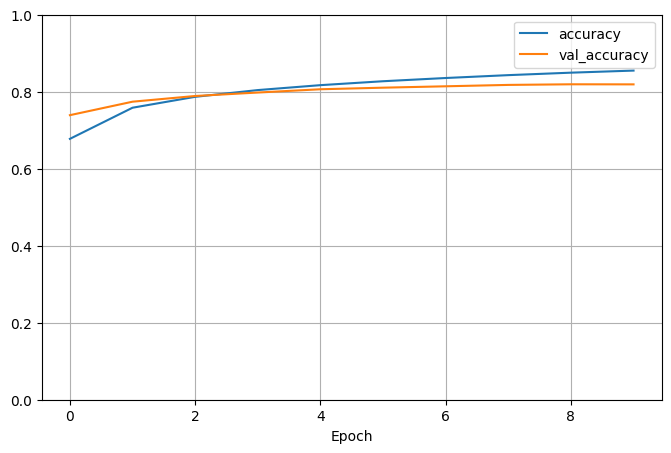

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8149 - loss: 0.5491
Accuracy on test data: 0.8145


In [ ]:
# Define our MLP layer by layer
def get_model(n_units_1=784, n_units_2=392,optimizer = 'adam', activation = 'tanh', learning_rate = 5e-2):
  model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(n_units_1, activation=activation),
    keras.layers.Dense(n_units_2, activation=activation),
    keras.layers.Dense(62, activation="softmax")
  ])
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
  return model

# Instantiate optimiser and compile the model.
opt = keras.optimizers.SGD(learning_rate=5e-2)
model3 = get_model(optimizer=opt)


# print model structure
model3.summary()

# Train the classifier.
history = model3.fit(MLP_X_train, MLP_y_train, epochs=10,
                    validation_data=(X_valid, MLP_y_valid)
                    )

# set figure size
plt.figure(figsize=(12,5))

# Convert the history dictionary to a Pandas dataframe and extract the accuracies
accuracies = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]

# Plot the accuracies
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

# Evaluate the classifier on the test data.
loss, accuracy = model3.evaluate(MLP_X_test, MLP_y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

# **Step 4 Tune hyper parameter**

In this step, we tune the hyperparameters of each model.

## **Model1**

Here is the LSTM, we mainly tune:
- n_units(the number of neurons) in LSTM layer and the first dense layer
- dropout_rate in dropout layer
- optimizer of this model


In [ ]:
#Set the parameters need to be tuned
param_grid = {
    'model__n_units': [50, 100, 150],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__optimizer': ['adam', 'rmsprop']
}


In [ ]:
#Using Randomized Search method for tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2)
random_search.fit(X_train, y_train, epochs=10)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4532 - loss: 2.1889
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7405 - loss: 0.8421
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7829 - loss: 0.6595
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8055 - loss: 0.5737
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8215 - loss: 0.5168
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8323 - loss: 0.4783
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8364 - loss: 0.4578
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8429 - loss: 0.4366
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8464 - loss: 0.4126
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8498 - loss: 0.4042
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.1, model__n_units=100, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4622 - loss: 2.1416
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7478 - loss: 0.8184
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7870 - loss: 0.6427
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8101 - loss: 0.5589
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8213 - loss: 0.5092
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8293 - loss: 0.4862
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8347 - loss: 0.4556
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8454 - loss: 0.4250
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8454 - loss: 0.4143
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8547 - loss: 0.3934
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.1, model__n_units=100, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4546 - loss: 2.1359
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7485 - loss: 0.7956
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7923 - loss: 0.6287
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8112 - loss: 0.5538
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8231 - loss: 0.5035
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8307 - loss: 0.4708
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8379 - loss: 0.4445
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8429 - loss: 0.4290
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8482 - loss: 0.4118
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8557 - loss: 0.3819
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.1, model__n_units=100, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4436 - loss: 2.2037
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7337 - loss: 0.8617
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7795 - loss: 0.6731
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8025 - loss: 0.5992
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8148 - loss: 0.5478
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8234 - loss: 0.5150
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8304 - loss: 0.4849
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8330 - loss: 0.4745
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8414 - loss: 0.4397
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8458 - loss: 0.4289
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
[CV] END model__dropout_rate=0.3, model__n_units=100, model__optimizer=rmspro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4156 - loss: 2.3013
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7275 - loss: 0.8872
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7850 - loss: 0.6708
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8060 - loss: 0.5844
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8133 - loss: 0.5391
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8271 - loss: 0.4965
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8307 - loss: 0.4796
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8392 - loss: 0.4526
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8430 - loss: 0.4374
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8443 - loss: 0.4239
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=100, model__optimizer=rmspro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4416 - loss: 2.2151
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7341 - loss: 0.8609
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7846 - loss: 0.6627
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8035 - loss: 0.5891
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8203 - loss: 0.5234
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8260 - loss: 0.4969
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8344 - loss: 0.4731
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8442 - loss: 0.4471
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8427 - loss: 0.4326
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8509 - loss: 0.4173
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=100, model__optimizer=rmspro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4743 - loss: 2.0701
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7633 - loss: 0.7484
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8007 - loss: 0.5923
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8191 - loss: 0.5256
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8312 - loss: 0.4740
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8402 - loss: 0.4472
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8449 - loss: 0.4228
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8519 - loss: 0.4018
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8572 - loss: 0.3827
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8605 - loss: 0.3714
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.1, model__n_units=150, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4716 - loss: 2.0440
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7534 - loss: 0.7727
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7964 - loss: 0.5952
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8126 - loss: 0.5366
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8277 - loss: 0.4884
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8380 - loss: 0.4491
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8479 - loss: 0.4144
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8546 - loss: 0.3933
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8557 - loss: 0.3800
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8633 - loss: 0.3633
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.1, model__n_units=150, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4849 - loss: 2.0161
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7630 - loss: 0.7354
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7978 - loss: 0.5948
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8183 - loss: 0.5177
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8307 - loss: 0.4733
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8406 - loss: 0.4464
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8457 - loss: 0.4158
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8537 - loss: 0.3930
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8595 - loss: 0.3782
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8652 - loss: 0.3594
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.1, model__n_units=150, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4442 - loss: 2.2148
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7390 - loss: 0.8440
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7823 - loss: 0.6699
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8038 - loss: 0.5849
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8182 - loss: 0.5282
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8294 - loss: 0.4950
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8320 - loss: 0.4681
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8416 - loss: 0.4447
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8439 - loss: 0.4284
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8478 - loss: 0.4139
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=100, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4366 - loss: 2.2075
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7418 - loss: 0.8236
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7840 - loss: 0.6514
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8009 - loss: 0.5878
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8160 - loss: 0.5346
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8258 - loss: 0.4955
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8325 - loss: 0.4724
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8405 - loss: 0.4467
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8456 - loss: 0.4276
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8473 - loss: 0.4204
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=100, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4309 - loss: 2.2426
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7405 - loss: 0.8325
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7833 - loss: 0.6622
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8067 - loss: 0.5723
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8165 - loss: 0.5251
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8260 - loss: 0.4909
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8309 - loss: 0.4670
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8371 - loss: 0.4471
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8445 - loss: 0.4237
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8467 - loss: 0.4133
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=100, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3443 - loss: 2.6370
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6592 - loss: 1.1632
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7308 - loss: 0.8692
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7576 - loss: 0.7525
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7828 - loss: 0.6694
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7931 - loss: 0.6207
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8031 - loss: 0.5971
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8057 - loss: 0.5797
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8147 - loss: 0.5527
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8184 - loss: 0.5321
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=50, model__optimizer=rmsprop

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3495 - loss: 2.5874
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6693 - loss: 1.1162
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7307 - loss: 0.8572
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7618 - loss: 0.7452
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7762 - loss: 0.6823
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7884 - loss: 0.6363
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8001 - loss: 0.5962
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8042 - loss: 0.5726
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8119 - loss: 0.5473
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8187 - loss: 0.5337
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=50, model__optimizer=rmsprop

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3438 - loss: 2.6331
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6669 - loss: 1.1213
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7353 - loss: 0.8615
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7638 - loss: 0.7377
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7812 - loss: 0.6718
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7892 - loss: 0.6244
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8019 - loss: 0.5897
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8094 - loss: 0.5590
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8164 - loss: 0.5372
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8201 - loss: 0.5222
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=50, model__optimizer=rmsprop

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4762 - loss: 2.0464
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7588 - loss: 0.7485
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7973 - loss: 0.5970
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8179 - loss: 0.5300
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8240 - loss: 0.4936
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8332 - loss: 0.4608
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8451 - loss: 0.4319
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8501 - loss: 0.4134
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8512 - loss: 0.3987
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8580 - loss: 0.3766
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=150, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4561 - loss: 2.1339
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7547 - loss: 0.7779
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8023 - loss: 0.5921
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8190 - loss: 0.5273
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8314 - loss: 0.4805
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8368 - loss: 0.4530
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8454 - loss: 0.4259
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8482 - loss: 0.4098
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8528 - loss: 0.3907
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8571 - loss: 0.3775
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=150, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4583 - loss: 2.1130
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7596 - loss: 0.7620
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7972 - loss: 0.5936
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8167 - loss: 0.5297
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8313 - loss: 0.4799
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8355 - loss: 0.4554
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8423 - loss: 0.4346
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8490 - loss: 0.4066
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8542 - loss: 0.3910
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8573 - loss: 0.3762
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.3, model__n_units=150, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4846 - loss: 1.9953
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7626 - loss: 0.7421
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7989 - loss: 0.6000
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8192 - loss: 0.5241
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8315 - loss: 0.4832
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8372 - loss: 0.4552
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8424 - loss: 0.4290
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8513 - loss: 0.4044
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8562 - loss: 0.3903
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8593 - loss: 0.3786
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.2, model__n_units=150, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4723 - loss: 2.0535
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7649 - loss: 0.7433
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8019 - loss: 0.5966
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8167 - loss: 0.5335
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8307 - loss: 0.4763
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8412 - loss: 0.4506
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8447 - loss: 0.4277
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8464 - loss: 0.4111
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8543 - loss: 0.3881
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8586 - loss: 0.3718
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.2, model__n_units=150, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4795 - loss: 2.0520
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7610 - loss: 0.7589
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7991 - loss: 0.5959
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8185 - loss: 0.5179
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8294 - loss: 0.4779
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8372 - loss: 0.4490
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8477 - loss: 0.4152
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8532 - loss: 0.3971
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8584 - loss: 0.3763
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8589 - loss: 0.3711
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.2, model__n_units=150, model__optimiz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4358 - loss: 2.2620
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7317 - loss: 0.8592
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7851 - loss: 0.6653
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8050 - loss: 0.5827
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8163 - loss: 0.5354
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8296 - loss: 0.4942
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8361 - loss: 0.4681
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8426 - loss: 0.4489
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8451 - loss: 0.4296
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8482 - loss: 0.4165
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.1, model__n_units=100, model__optimizer=rmspro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4467 - loss: 2.2256
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7416 - loss: 0.8378
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7846 - loss: 0.6611
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8083 - loss: 0.5760
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8223 - loss: 0.5199
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8273 - loss: 0.4914
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8385 - loss: 0.4579
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8421 - loss: 0.4443
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8487 - loss: 0.4208
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8526 - loss: 0.4026
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.1, model__n_units=100, model__optimizer=rmspro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4388 - loss: 2.2406
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7411 - loss: 0.8391
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7877 - loss: 0.6519
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8095 - loss: 0.5678
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8193 - loss: 0.5147
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8297 - loss: 0.4881
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8350 - loss: 0.4617
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8435 - loss: 0.4378
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8492 - loss: 0.4201
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8546 - loss: 0.3988
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.1, model__n_units=100, model__optimizer=rmspro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3500 - loss: 2.5823
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6834 - loss: 1.0880
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7459 - loss: 0.8243
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7746 - loss: 0.7045
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7868 - loss: 0.6481
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7982 - loss: 0.6094
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8062 - loss: 0.5839
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8156 - loss: 0.5467
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8199 - loss: 0.5312
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8225 - loss: 0.5103
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.2, model__n_units=50, model__optimizer=rmsprop

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3752 - loss: 2.5105
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6724 - loss: 1.1289
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7328 - loss: 0.8668
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7601 - loss: 0.7457
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7804 - loss: 0.6715
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7958 - loss: 0.6182
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8048 - loss: 0.5880
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8085 - loss: 0.5688
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8172 - loss: 0.5423
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8186 - loss: 0.5314
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.2, model__n_units=50, model__optimizer=rmsprop

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3698 - loss: 2.5023
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6723 - loss: 1.1126
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7396 - loss: 0.8432
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7692 - loss: 0.7196
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7871 - loss: 0.6565
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7959 - loss: 0.6159
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8061 - loss: 0.5731
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8154 - loss: 0.5453
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8201 - loss: 0.5212
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8239 - loss: 0.5074
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.2, model__n_units=50, model__optimizer=rmsprop

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4556 - loss: 2.1409
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7535 - loss: 0.7818
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8010 - loss: 0.6053
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8184 - loss: 0.5327
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8286 - loss: 0.4959
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8359 - loss: 0.4535
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8443 - loss: 0.4332
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8515 - loss: 0.4105
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8549 - loss: 0.3916
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8557 - loss: 0.3842
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.2, model__n_units=150, model__optimizer=rmspro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4438 - loss: 2.1860
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7507 - loss: 0.7830
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7939 - loss: 0.6200
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8136 - loss: 0.5418
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8289 - loss: 0.4892
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8358 - loss: 0.4599
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8458 - loss: 0.4278
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8529 - loss: 0.4113
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8553 - loss: 0.3943
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8607 - loss: 0.3803
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.2, model__n_units=150, model__optimizer=rmspro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4647 - loss: 2.1038
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7549 - loss: 0.7811
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7961 - loss: 0.6113
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8155 - loss: 0.5363
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8278 - loss: 0.4919
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8378 - loss: 0.4544
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8451 - loss: 0.4347
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8528 - loss: 0.4090
Epoch 9/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8545 - loss: 0.3942
Epoch 10/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8613 - loss: 0.3743
834/834 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[CV] END model__dropout_rate=0.2, model__n_units=150, model__optimizer=rmspro

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5243 - loss: 1.8082
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7845 - loss: 0.6589
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8170 - loss: 0.5342
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8293 - loss: 0.4876
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8397 - loss: 0.4450
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8463 - loss: 0.4194
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8519 - loss: 0.3977
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8554 - loss: 0.3817
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8616 - loss: 0.3654
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8643 - loss: 0.3576


RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(model=<function create_model at 0x7c54e0498310>),
                   param_distributions={'model__dropout_rate': [0.1, 0.2, 0.3],
                                        'model__n_units': [50, 100, 150],
                                        'model__optimizer': ['adam',
                                                             'rmsprop']},
                   verbose=2)

## **Model2**

Here is CNN, we mainly choose to tune:
- batch_size
- epochs
- optimizer
- dropout_rate

In [ ]:
# TODO: Fine-tune the hyperparameters of model 2
# Wrapping the model as KerasClassifier for GridSearch
model2 = KerasClassifier(model=create_model2, verbose=0, dropout_rate=0.5)

# Define hyperparameter network
param_grid = {
    'batch_size': [64],
    'epochs': [10],
    'optimizer': ['adam', 'sgd', 'rmsprop', 'adadelta', 'nadam', 'ftrl'],
    'dropout_rate': [0.5]
}

# GridSearchCV
grid_search_2 = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)

grid_search_2.fit(X_train2, y_train2)
best_params_model_2 = grid_search_2.best_params_
best_model_2 = grid_search_2.best_estimator_

# Evaluate the best model on the test set
best_pre = best_model_2.predict(features)
accuracy_best_model_2 = accuracy_score(labels, best_pre)
f1_best_model_2 = f1_score(labels, best_pre, average="macro")

print(f"Best Model 2 Accuracy: {accuracy_best_model_2}")
print(f"Best Model 2 F1 Score: {f1_best_model_2:.4f}")
print(grid_search_2.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Model 2 Accuracy: 0.85923
Best Model 2 F1 Score: 0.7417
{'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 10, 'optimizer': 'rmsprop'}


In [ ]:
# TODO: Fine-tune the hyperparameters of model 2
# Wrapping the model as KerasClassifier for GridSearch
model2 = KerasClassifier(model=create_model2, verbose=0, dropout_rate=0.5)

# Define hyperparameter network
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10],
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.5]
}

# GridSearchCV
grid_search_2 = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)

grid_search_2.fit(X_train2, y_train2)
best_params_model_2 = grid_search_2.best_params_
best_model_2 = grid_search_2.best_estimator_

# Evaluate the best model on the test set
best_pre = best_model_2.predict(features)
accuracy_best_model_2 = accuracy_score(labels, best_pre)
f1_best_model_2 = f1_score(labels, best_pre, average="macro")

print(f"Best Model 2 Accuracy: {accuracy_best_model_2}")
print(f"Best Model 2 F1 Score: {f1_best_model_2:.4f}")
print(grid_search_2.best_params_)

Best Model 2 Accuracy: 0.86577
Best Model 2 F1 Score: 0.7567
{'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 10, 'optimizer': 'adam'}


In [ ]:
# TODO: Fine-tune the hyperparameters of model 2
# Wrapping the model as KerasClassifier for GridSearch
model2 = KerasClassifier(model=create_model2, verbose=0, dropout_rate=0.5)

# Define hyperparameter network
param_grid = {
    'batch_size': [32],
    'epochs': [10],
    'optimizer': ['adam'],
    'dropout_rate': [0.3, 0.5, 0.8]
}

# GridSearchCV
grid_search_2 = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)

grid_search_2.fit(X_train2, y_train2)
best_params_model_2 = grid_search_2.best_params_
best_model_2 = grid_search_2.best_estimator_

# Evaluate the best model on the test set
best_pre = best_model_2.predict(features)
accuracy_best_model_2 = accuracy_score(labels, best_pre)
f1_best_model_2 = f1_score(labels, best_pre, average="macro")

print(f"Best Model 2 Accuracy: {accuracy_best_model_2}")
print(f"Best Model 2 F1 Score: {f1_best_model_2:.4f}")
print(grid_search_2.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Model 2 Accuracy: 0.87194
Best Model 2 F1 Score: 0.7745
{'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 10, 'optimizer': 'adam'}


In [ ]:
# TODO: Fine-tune the hyperparameters of model 2
# Wrapping the model as KerasClassifier for GridSearch
model2 = KerasClassifier(model=create_model2, verbose=0, dropout_rate=0.5)

# Define hyperparameter network
opt1 = keras.optimizers.Adam(learning_rate=0.1)
opt2 = keras.optimizers.Adam(learning_rate=0.01)
opt3 = keras.optimizers.Adam(learning_rate=0.001)
param_grid = {
    'batch_size': [32],
    'epochs': [10, 20],
    'optimizer': [opt2],
    'dropout_rate': [0.3]
}

# GridSearchCV
grid_search_2 = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)

grid_search_2.fit(X_train2, y_train2)
best_params_model_2 = grid_search_2.best_params_
best_model_2 = grid_search_2.best_estimator_

# Evaluate the best model on the test set
best_pre = best_model_2.predict(features)
accuracy_best_model_2 = accuracy_score(labels, best_pre)
f1_best_model_2 = f1_score(labels, best_pre, average="macro")

print(f"Best Model 2 Accuracy: {accuracy_best_model_2}")
print(f"Best Model 2 F1 Score: {f1_best_model_2:.4f}")
print(grid_search_2.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Model 2 Accuracy: 0.86713
Best Model 2 F1 Score: 0.7632
{'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 10, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x7f70d9a8f850>}


## **Model3**

Here is MLP, we mainly choose to tune below hyperparameters:
- number of neurons in each layer
- activation functions
- optimiser

Due to the runtime of neural networks is generally much higher than traditional ML algorithms unless we run our algorithms on powerful GPUs (which can better parallelise the computations). Therefore, I only choose them. Due to the 9 hours training time, I comment below code, you can directly check the output from the notation part.

In [ ]:
"""
# Code
# Create a KerasClassifier object which works with sklearn grid searches
# We need to pass default values of arguments in build_mlp if we wish to tune them
keras_classifier = KerasClassifier(build_fn=get_model,
                                   n_units_1=784,
                                   n_units_2 = 392,
                                   optimizer = 'adam',
                                   activation = 'tanh',
                                   learning_rate = 5e-2
                                  )

# n_units, optimizer, activation, learning_rate = 5e-2
param_grid = {
    # Neuron in first layer should less than attributes
    "n_units_1": [500, 784],
    "n_units_2": [784//2, 784//3, 784//4],
    "activation": ["relu", "sigmoid", "tanh"],
    "optimizer": ["adam", "sgd"]
}

grid_search_cv = GridSearchCV(keras_classifier, param_grid, cv=3, verbose=2,error_score='raise')
grid_search_cv.fit(MLP_X_train, MLP_y_train, epochs=10)

#====================================================================================
# result

Fitting 3 folds for each of 36 candidates, totalling 108 fits
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6363 - loss: 1.3324
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7975 - loss: 0.6039
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8233 - loss: 0.5038
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8382 - loss: 0.4394
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8500 - loss: 0.3992
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8641 - loss: 0.3579
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8726 - loss: 0.3252
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8838 - loss: 0.2999
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8871 - loss: 0.2868
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8936 - loss: 0.2697
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=392, optimizer=adam; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6347 - loss: 1.3364
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7952 - loss: 0.6088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8257 - loss: 0.4946
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8438 - loss: 0.4321
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8552 - loss: 0.3888
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8632 - loss: 0.3588
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8731 - loss: 0.3265
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8817 - loss: 0.3031
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8886 - loss: 0.2832
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8962 - loss: 0.2640
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=392, optimizer=adam; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6374 - loss: 1.3190
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7972 - loss: 0.6071
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8241 - loss: 0.4963
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8408 - loss: 0.4304
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8542 - loss: 0.3874
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8666 - loss: 0.3541
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8719 - loss: 0.3326
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8830 - loss: 0.3016
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8913 - loss: 0.2761
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8967 - loss: 0.2619
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=392, optimizer=adam; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6360 - loss: 1.3322
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7959 - loss: 0.6043
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8235 - loss: 0.4964
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8430 - loss: 0.4328
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8584 - loss: 0.3831
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8660 - loss: 0.3534
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8739 - loss: 0.3273
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8800 - loss: 0.3063
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8891 - loss: 0.2815
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8970 - loss: 0.2606
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=392, optimizer=sgd; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6388 - loss: 1.3221
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7959 - loss: 0.6140
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8231 - loss: 0.5013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8386 - loss: 0.4405
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8545 - loss: 0.3894
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8622 - loss: 0.3599
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8757 - loss: 0.3231
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8841 - loss: 0.3014
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8880 - loss: 0.2884
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8956 - loss: 0.2691
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=392, optimizer=sgd; total time= 4.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6349 - loss: 1.3341
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7982 - loss: 0.6077
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8255 - loss: 0.4981
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8381 - loss: 0.4416
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8561 - loss: 0.3907
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8636 - loss: 0.3522
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8713 - loss: 0.3323
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8824 - loss: 0.2996
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8887 - loss: 0.2814
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8929 - loss: 0.2708
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=392, optimizer=sgd; total time= 3.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.6340 - loss: 1.3432
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7961 - loss: 0.6199
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8272 - loss: 0.5003
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8391 - loss: 0.4422
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8525 - loss: 0.4010
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8628 - loss: 0.3609
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8739 - loss: 0.3322
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8823 - loss: 0.3065
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8867 - loss: 0.2944
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8920 - loss: 0.2724
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=261, optimizer=adam; total time= 3.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6335 - loss: 1.3514
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7941 - loss: 0.6153
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8219 - loss: 0.5095
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8406 - loss: 0.4446
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8522 - loss: 0.3998
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8639 - loss: 0.3624
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8723 - loss: 0.3334
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8782 - loss: 0.3085
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8868 - loss: 0.2887
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8914 - loss: 0.2749
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=261, optimizer=adam; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6384 - loss: 1.3416
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7932 - loss: 0.6239
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8217 - loss: 0.5044
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8359 - loss: 0.4503
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8522 - loss: 0.3944
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8650 - loss: 0.3583
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8706 - loss: 0.3331
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8811 - loss: 0.3032
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8862 - loss: 0.2896
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8915 - loss: 0.2712
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=261, optimizer=adam; total time= 3.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6330 - loss: 1.3593
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7948 - loss: 0.6211
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8202 - loss: 0.5065
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8417 - loss: 0.4435
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8502 - loss: 0.4007
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8594 - loss: 0.3665
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8710 - loss: 0.3314
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8761 - loss: 0.3177
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8859 - loss: 0.2972
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8921 - loss: 0.2712
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=261, optimizer=sgd; total time= 3.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6373 - loss: 1.3518
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7926 - loss: 0.6190
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8251 - loss: 0.5026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8388 - loss: 0.4436
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8541 - loss: 0.3962
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8610 - loss: 0.3669
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8695 - loss: 0.3405
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8791 - loss: 0.3100
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8870 - loss: 0.2895
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8920 - loss: 0.2723
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=261, optimizer=sgd; total time= 3.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6302 - loss: 1.3636
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7947 - loss: 0.6090
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8206 - loss: 0.5119
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8365 - loss: 0.4516
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8522 - loss: 0.3986
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8593 - loss: 0.3712
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8695 - loss: 0.3387
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8794 - loss: 0.3071
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8859 - loss: 0.2919
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8898 - loss: 0.2755
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=261, optimizer=sgd; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6271 - loss: 1.3915
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7930 - loss: 0.6270
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8199 - loss: 0.5187
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8360 - loss: 0.4548
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8517 - loss: 0.4046
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8584 - loss: 0.3746
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8700 - loss: 0.3474
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8734 - loss: 0.3284
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8810 - loss: 0.3045
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8900 - loss: 0.2813
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=196, optimizer=adam; total time= 3.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6301 - loss: 1.3744
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7953 - loss: 0.6129
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8245 - loss: 0.5125
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8386 - loss: 0.4497
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8492 - loss: 0.4084
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8607 - loss: 0.3716
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8683 - loss: 0.3435
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8748 - loss: 0.3216
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8833 - loss: 0.2961
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8900 - loss: 0.2794
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=196, optimizer=adam; total time= 3.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6287 - loss: 1.3877
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7959 - loss: 0.6276
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8219 - loss: 0.5185
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8346 - loss: 0.4572
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8485 - loss: 0.4125
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8594 - loss: 0.3742
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8677 - loss: 0.3452
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8770 - loss: 0.3193
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8809 - loss: 0.3056
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8886 - loss: 0.2857
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=196, optimizer=adam; total time= 3.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6289 - loss: 1.3712
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7956 - loss: 0.6222
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8213 - loss: 0.5120
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8375 - loss: 0.4517
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8502 - loss: 0.4081
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8593 - loss: 0.3697
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8687 - loss: 0.3439
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8745 - loss: 0.3200
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8860 - loss: 0.2962
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8901 - loss: 0.2792
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=196, optimizer=sgd; total time= 3.1min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6245 - loss: 1.4015
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7926 - loss: 0.6192
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8255 - loss: 0.5121
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8371 - loss: 0.4507
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8491 - loss: 0.4079
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8590 - loss: 0.3738
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8708 - loss: 0.3409
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8770 - loss: 0.3181
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8848 - loss: 0.2937
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8899 - loss: 0.2810
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=196, optimizer=sgd; total time= 3.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6332 - loss: 1.3744
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7966 - loss: 0.6200
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8220 - loss: 0.5182
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8385 - loss: 0.4529
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8511 - loss: 0.4055
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8586 - loss: 0.3775
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8684 - loss: 0.3470
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8776 - loss: 0.3176
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8824 - loss: 0.3013
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8879 - loss: 0.2823
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=500, n_units_2=196, optimizer=sgd; total time= 3.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.6489 - loss: 1.2902
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.7964 - loss: 0.6032
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8266 - loss: 0.4912
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8447 - loss: 0.4237
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8571 - loss: 0.3824
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8687 - loss: 0.3452
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8767 - loss: 0.3208
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8831 - loss: 0.2959
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8924 - loss: 0.2730
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8976 - loss: 0.2618
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=392, optimizer=adam; total time= 5.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6403 - loss: 1.3078
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7978 - loss: 0.5938
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8207 - loss: 0.4996
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8428 - loss: 0.4286
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8580 - loss: 0.3747
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8696 - loss: 0.3432
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8738 - loss: 0.3183
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8823 - loss: 0.2988
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8887 - loss: 0.2799
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8965 - loss: 0.2664
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=392, optimizer=adam; total time= 6.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6503 - loss: 1.2777
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7990 - loss: 0.5930
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8263 - loss: 0.4933
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8415 - loss: 0.4290
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8568 - loss: 0.3842
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8674 - loss: 0.3481
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8745 - loss: 0.3197
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8821 - loss: 0.2957
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8895 - loss: 0.2785
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8996 - loss: 0.2587
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=392, optimizer=adam; total time= 5.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.6467 - loss: 1.2919
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7958 - loss: 0.6024
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8248 - loss: 0.4976
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8420 - loss: 0.4314
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8540 - loss: 0.3891
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8661 - loss: 0.3511
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8741 - loss: 0.3215
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8797 - loss: 0.3018
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8916 - loss: 0.2757
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8959 - loss: 0.2641
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=392, optimizer=sgd; total time= 5.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6426 - loss: 1.2961
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7999 - loss: 0.5933
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8263 - loss: 0.4809
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8421 - loss: 0.4328
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8563 - loss: 0.3802
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8640 - loss: 0.3522
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8760 - loss: 0.3216
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8854 - loss: 0.2933
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8890 - loss: 0.2815
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8971 - loss: 0.2624
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=392, optimizer=sgd; total time= 5.1min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.6440 - loss: 1.2951
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8002 - loss: 0.5962
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8242 - loss: 0.4967
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8410 - loss: 0.4310
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8592 - loss: 0.3780
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8666 - loss: 0.3494
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8749 - loss: 0.3240
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8815 - loss: 0.2984
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8903 - loss: 0.2773
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8950 - loss: 0.2620
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=392, optimizer=sgd; total time= 5.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6366 - loss: 1.3331
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7965 - loss: 0.6064
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8245 - loss: 0.5021
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8413 - loss: 0.4323
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8545 - loss: 0.3848
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8646 - loss: 0.3530
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.8763 - loss: 0.3261
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8827 - loss: 0.2993
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8877 - loss: 0.2837
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8961 - loss: 0.2664
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=261, optimizer=adam; total time= 5.7min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6373 - loss: 1.3378
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7960 - loss: 0.6068
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8292 - loss: 0.4949
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8399 - loss: 0.4358
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8530 - loss: 0.3885
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8659 - loss: 0.3533
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8720 - loss: 0.3306
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8791 - loss: 0.3069
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8889 - loss: 0.2821
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8973 - loss: 0.2614
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=261, optimizer=adam; total time= 5.7min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.6386 - loss: 1.3261
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7942 - loss: 0.6149
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8229 - loss: 0.5004
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.8406 - loss: 0.4408
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8556 - loss: 0.3891
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8648 - loss: 0.3568
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.8723 - loss: 0.3306
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8808 - loss: 0.3106
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8865 - loss: 0.2893
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8935 - loss: 0.2694
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=261, optimizer=adam; total time= 5.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6360 - loss: 1.3400
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7985 - loss: 0.6105
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8270 - loss: 0.4970
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8410 - loss: 0.4394
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8525 - loss: 0.3923
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8673 - loss: 0.3540
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8728 - loss: 0.3284
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8832 - loss: 0.2992
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8873 - loss: 0.2866
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8941 - loss: 0.2695
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=261, optimizer=sgd; total time= 5.7min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6395 - loss: 1.3207
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7941 - loss: 0.6079
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8280 - loss: 0.4957
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8409 - loss: 0.4386
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8540 - loss: 0.3949
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8660 - loss: 0.3499
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8745 - loss: 0.3254
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8836 - loss: 0.3024
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8862 - loss: 0.2896
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8940 - loss: 0.2700
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=261, optimizer=sgd; total time= 5.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6445 - loss: 1.3099
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7977 - loss: 0.6075
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8258 - loss: 0.4972
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8424 - loss: 0.4360
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8562 - loss: 0.3891
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8622 - loss: 0.3584
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8746 - loss: 0.3251
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8834 - loss: 0.3016
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8880 - loss: 0.2896
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8914 - loss: 0.2719
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=261, optimizer=sgd; total time= 5.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.6385 - loss: 1.3420
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.7961 - loss: 0.6194
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8225 - loss: 0.5076
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8399 - loss: 0.4421
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8533 - loss: 0.3980
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8645 - loss: 0.3623
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8700 - loss: 0.3388
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8768 - loss: 0.3153
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8870 - loss: 0.2881
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.8923 - loss: 0.2731
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=196, optimizer=adam; total time= 5.8min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.6377 - loss: 1.3322
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.7966 - loss: 0.6124
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8235 - loss: 0.5012
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8425 - loss: 0.4393
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8513 - loss: 0.3998
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8622 - loss: 0.3597
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8732 - loss: 0.3245
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8784 - loss: 0.3116
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8868 - loss: 0.2906
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8909 - loss: 0.2755
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=196, optimizer=adam; total time= 5.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6375 - loss: 1.3490
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.7954 - loss: 0.6118
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8231 - loss: 0.5028
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8437 - loss: 0.4418
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8500 - loss: 0.4072
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8613 - loss: 0.3673
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8714 - loss: 0.3379
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8779 - loss: 0.3125
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8862 - loss: 0.2878
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8906 - loss: 0.2761
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=196, optimizer=adam; total time= 5.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6316 - loss: 1.3662
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.7948 - loss: 0.6181
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8199 - loss: 0.5070
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8396 - loss: 0.4432
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8500 - loss: 0.4056
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8652 - loss: 0.3646
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8731 - loss: 0.3357
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8807 - loss: 0.3112
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8875 - loss: 0.2887
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8909 - loss: 0.2758
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=196, optimizer=sgd; total time= 5.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.6337 - loss: 1.3613
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8005 - loss: 0.6049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8235 - loss: 0.5022
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8434 - loss: 0.4355
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8490 - loss: 0.4006
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8648 - loss: 0.3562
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8720 - loss: 0.3329
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8779 - loss: 0.3134
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8850 - loss: 0.2953
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8892 - loss: 0.2785
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=196, optimizer=sgd; total time= 5.7min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6332 - loss: 1.3589
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7977 - loss: 0.6049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8220 - loss: 0.5030
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8404 - loss: 0.4464
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8525 - loss: 0.3946
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8631 - loss: 0.3639
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8730 - loss: 0.3339
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8825 - loss: 0.3042
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8852 - loss: 0.2927
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8909 - loss: 0.2782
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[CV] END activation=relu, n_units_1=784, n_units_2=196, optimizer=sgd; total time= 5.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.5229 - loss: 1.8861
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7535 - loss: 0.7860
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7958 - loss: 0.6287
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8203 - loss: 0.5359
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8329 - loss: 0.4793
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8479 - loss: 0.4313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8536 - loss: 0.3999
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8628 - loss: 0.3689
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8700 - loss: 0.3467
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8790 - loss: 0.3205
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=392, optimizer=adam; total time= 4.6min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5222 - loss: 1.8867
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7547 - loss: 0.7810
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7944 - loss: 0.6218
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8181 - loss: 0.5374
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8334 - loss: 0.4726
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8458 - loss: 0.4353
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8555 - loss: 0.4001
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8656 - loss: 0.3660
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.8702 - loss: 0.3453
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8812 - loss: 0.3157
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=392, optimizer=adam; total time= 5.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.5252 - loss: 1.8746
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7523 - loss: 0.7876
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7962 - loss: 0.6197
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8230 - loss: 0.5218
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8337 - loss: 0.4789
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8470 - loss: 0.4306
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8583 - loss: 0.3957
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8639 - loss: 0.3642
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8744 - loss: 0.3379
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8823 - loss: 0.3132
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=392, optimizer=adam; total time= 4.6min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.5228 - loss: 1.8866
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7550 - loss: 0.7881
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8015 - loss: 0.6185
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8181 - loss: 0.5298
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8357 - loss: 0.4741
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8461 - loss: 0.4355
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8554 - loss: 0.3967
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8638 - loss: 0.3686
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8723 - loss: 0.3374
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8796 - loss: 0.3178
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=392, optimizer=sgd; total time= 4.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5263 - loss: 1.8825
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7546 - loss: 0.7927
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7949 - loss: 0.6229
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8169 - loss: 0.5301
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8339 - loss: 0.4726
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8453 - loss: 0.4317
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8555 - loss: 0.3984
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8609 - loss: 0.3699
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8741 - loss: 0.3391
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8773 - loss: 0.3184
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=392, optimizer=sgd; total time= 4.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.5251 - loss: 1.8690
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7564 - loss: 0.7821
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7974 - loss: 0.6154
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8202 - loss: 0.5259
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8356 - loss: 0.4694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8470 - loss: 0.4285
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8576 - loss: 0.3950
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8651 - loss: 0.3635
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8723 - loss: 0.3359
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8809 - loss: 0.3130
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=392, optimizer=sgd; total time= 5.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5172 - loss: 1.9229
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7504 - loss: 0.8155
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7941 - loss: 0.6331
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8169 - loss: 0.5492
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8333 - loss: 0.4858
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8464 - loss: 0.4436
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8539 - loss: 0.4078
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8610 - loss: 0.3754
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8692 - loss: 0.3536
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8774 - loss: 0.3286
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=261, optimizer=adam; total time= 3.8min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5162 - loss: 1.9314
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7549 - loss: 0.7970
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7951 - loss: 0.6305
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8147 - loss: 0.5462
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8333 - loss: 0.4862
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8435 - loss: 0.4456
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8543 - loss: 0.4114
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8624 - loss: 0.3769
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8721 - loss: 0.3489
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8791 - loss: 0.3239
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=261, optimizer=adam; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5117 - loss: 1.9422
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7561 - loss: 0.7947
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7970 - loss: 0.6251
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8162 - loss: 0.5472
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8313 - loss: 0.4862
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8414 - loss: 0.4473
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8515 - loss: 0.4132
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8631 - loss: 0.3722
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8709 - loss: 0.3512
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8786 - loss: 0.3265
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=261, optimizer=adam; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5214 - loss: 1.9195
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7544 - loss: 0.8109
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7975 - loss: 0.6278
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8161 - loss: 0.5460
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8306 - loss: 0.4902
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8455 - loss: 0.4437
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8550 - loss: 0.4037
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8644 - loss: 0.3770
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8671 - loss: 0.3584
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8814 - loss: 0.3230
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=261, optimizer=sgd; total time= 3.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.5194 - loss: 1.9240
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7534 - loss: 0.8030
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7955 - loss: 0.6218
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8164 - loss: 0.5500
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8329 - loss: 0.4858
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8429 - loss: 0.4464
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8523 - loss: 0.4099
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8616 - loss: 0.3802
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8702 - loss: 0.3498
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8755 - loss: 0.3299
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=261, optimizer=sgd; total time= 3.8min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5193 - loss: 1.9223
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7523 - loss: 0.7978
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7962 - loss: 0.6302
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8192 - loss: 0.5415
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8320 - loss: 0.4876
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8451 - loss: 0.4385
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8548 - loss: 0.4083
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8590 - loss: 0.3868
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8727 - loss: 0.3493
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8759 - loss: 0.3328
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=261, optimizer=sgd; total time= 3.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5110 - loss: 1.9825
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7533 - loss: 0.8213
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7910 - loss: 0.6493
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8130 - loss: 0.5631
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8311 - loss: 0.4916
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8455 - loss: 0.4464
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8518 - loss: 0.4160
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8587 - loss: 0.3859
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8703 - loss: 0.3600
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8765 - loss: 0.3349
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=196, optimizer=adam; total time= 3.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5161 - loss: 1.9690
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7488 - loss: 0.8185
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7905 - loss: 0.6460
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8167 - loss: 0.5540
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8314 - loss: 0.4944
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8438 - loss: 0.4482
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8530 - loss: 0.4150
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8633 - loss: 0.3815
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8666 - loss: 0.3620
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8756 - loss: 0.3367
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=196, optimizer=adam; total time= 3.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5200 - loss: 1.9715
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7493 - loss: 0.8230
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7919 - loss: 0.6435
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8129 - loss: 0.5556
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8354 - loss: 0.4839
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8425 - loss: 0.4496
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8510 - loss: 0.4160
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8595 - loss: 0.3886
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8711 - loss: 0.3571
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8769 - loss: 0.3348
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=196, optimizer=adam; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.5074 - loss: 1.9900
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7490 - loss: 0.8227
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7900 - loss: 0.6476
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8171 - loss: 0.5520
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8343 - loss: 0.4887
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8437 - loss: 0.4512
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8534 - loss: 0.4148
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8604 - loss: 0.3861
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8703 - loss: 0.3590
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8792 - loss: 0.3324
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=196, optimizer=sgd; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5083 - loss: 1.9712
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7487 - loss: 0.8211
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7917 - loss: 0.6416
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8125 - loss: 0.5590
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8315 - loss: 0.4861
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8442 - loss: 0.4482
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8507 - loss: 0.4155
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8602 - loss: 0.3824
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8684 - loss: 0.3562
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8759 - loss: 0.3337
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=196, optimizer=sgd; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.5097 - loss: 1.9915
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7528 - loss: 0.8124
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7931 - loss: 0.6448
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8174 - loss: 0.5492
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8330 - loss: 0.4883
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8448 - loss: 0.4481
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8540 - loss: 0.4126
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8604 - loss: 0.3831
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8709 - loss: 0.3521
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8778 - loss: 0.3378
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=sigmoid, n_units_1=500, n_units_2=196, optimizer=sgd; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.5361 - loss: 1.8049
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7649 - loss: 0.7524
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8041 - loss: 0.5885
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8254 - loss: 0.5104
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8415 - loss: 0.4523
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8533 - loss: 0.4011
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8642 - loss: 0.3676
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8754 - loss: 0.3373
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8823 - loss: 0.3068
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8870 - loss: 0.2892
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=392, optimizer=adam; total time= 6.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.5321 - loss: 1.8176
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.7616 - loss: 0.7501
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8034 - loss: 0.5936
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8264 - loss: 0.5017
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8417 - loss: 0.4459
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8490 - loss: 0.4063
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8640 - loss: 0.3653
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8727 - loss: 0.3415
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8821 - loss: 0.3154
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8888 - loss: 0.2914
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=392, optimizer=adam; total time= 5.8min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.5374 - loss: 1.8113
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7658 - loss: 0.7399
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8040 - loss: 0.5878
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8273 - loss: 0.5001
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8399 - loss: 0.4500
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8546 - loss: 0.4016
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8658 - loss: 0.3651
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8760 - loss: 0.3322
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8830 - loss: 0.3097
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8876 - loss: 0.2880
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=392, optimizer=adam; total time= 5.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.5423 - loss: 1.7940
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.7703 - loss: 0.7493
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8045 - loss: 0.5899
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8230 - loss: 0.5115
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8400 - loss: 0.4455
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8523 - loss: 0.4068
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8647 - loss: 0.3657
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8753 - loss: 0.3341
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8835 - loss: 0.3104
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.8914 - loss: 0.2848
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=392, optimizer=sgd; total time= 6.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.5379 - loss: 1.7974
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.7647 - loss: 0.7484
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8014 - loss: 0.5959
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8265 - loss: 0.5038
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8411 - loss: 0.4467
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8555 - loss: 0.4042
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8650 - loss: 0.3688
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8751 - loss: 0.3359
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8824 - loss: 0.3100
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.8908 - loss: 0.2861
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=392, optimizer=sgd; total time= 6.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.5340 - loss: 1.8201
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7676 - loss: 0.7394
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8053 - loss: 0.5842
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8288 - loss: 0.4976
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8447 - loss: 0.4419
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8542 - loss: 0.4010
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8638 - loss: 0.3660
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8741 - loss: 0.3338
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8807 - loss: 0.3105
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8895 - loss: 0.2882
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=392, optimizer=sgd; total time= 5.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.5342 - loss: 1.8554
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.7621 - loss: 0.7741
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8013 - loss: 0.6033
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8232 - loss: 0.5203
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8395 - loss: 0.4564
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8507 - loss: 0.4143
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8615 - loss: 0.3817
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8701 - loss: 0.3462
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8792 - loss: 0.3216
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8868 - loss: 0.2985
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=261, optimizer=adam; total time= 5.8min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.5274 - loss: 1.8843
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7620 - loss: 0.7558
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8045 - loss: 0.5970
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8248 - loss: 0.5169
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8384 - loss: 0.4617
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8526 - loss: 0.4120
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8649 - loss: 0.3716
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8718 - loss: 0.3482
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8835 - loss: 0.3168
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8856 - loss: 0.2997
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=261, optimizer=adam; total time= 6.1min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.5309 - loss: 1.8510
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7660 - loss: 0.7610
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8044 - loss: 0.5984
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8240 - loss: 0.5165
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8382 - loss: 0.4582
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8519 - loss: 0.4111
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8645 - loss: 0.3779
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8719 - loss: 0.3492
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8790 - loss: 0.3168
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8881 - loss: 0.2966
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=261, optimizer=adam; total time= 6.0min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.5323 - loss: 1.8581
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7652 - loss: 0.7538
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8032 - loss: 0.5999
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8240 - loss: 0.5156
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8401 - loss: 0.4587
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8496 - loss: 0.4208
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8606 - loss: 0.3761
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8715 - loss: 0.3432
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8785 - loss: 0.3212
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8863 - loss: 0.2997
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=261, optimizer=sgd; total time= 6.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.5289 - loss: 1.8576
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7623 - loss: 0.7644
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8032 - loss: 0.5958
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8269 - loss: 0.5083
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8412 - loss: 0.4573
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8507 - loss: 0.4168
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8635 - loss: 0.3796
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8723 - loss: 0.3469
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8794 - loss: 0.3196
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8838 - loss: 0.3016
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=261, optimizer=sgd; total time= 5.8min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.5306 - loss: 1.8567
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7627 - loss: 0.7619
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8047 - loss: 0.5929
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8238 - loss: 0.5131
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8422 - loss: 0.4534
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8532 - loss: 0.4127
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8631 - loss: 0.3716
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8715 - loss: 0.3486
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8808 - loss: 0.3173
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8896 - loss: 0.2902
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=261, optimizer=sgd; total time= 6.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.5227 - loss: 1.9257
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7564 - loss: 0.7908
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8011 - loss: 0.6138
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8233 - loss: 0.5230
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8383 - loss: 0.4626
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8505 - loss: 0.4254
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8618 - loss: 0.3814
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8684 - loss: 0.3571
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8740 - loss: 0.3308
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8852 - loss: 0.3072
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=196, optimizer=adam; total time= 5.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.5286 - loss: 1.9110
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7566 - loss: 0.7828
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8011 - loss: 0.6071
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8257 - loss: 0.5162
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8375 - loss: 0.4634
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8520 - loss: 0.4182
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8631 - loss: 0.3843
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8703 - loss: 0.3553
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8768 - loss: 0.3331
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8841 - loss: 0.3069
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=196, optimizer=adam; total time= 4.7min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.5173 - loss: 1.9297
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7632 - loss: 0.7724
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8023 - loss: 0.6103
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8214 - loss: 0.5250
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8400 - loss: 0.4632
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8491 - loss: 0.4236
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8612 - loss: 0.3852
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8731 - loss: 0.3509
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8769 - loss: 0.3274
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8860 - loss: 0.3071
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=196, optimizer=adam; total time= 6.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.5274 - loss: 1.9054
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7575 - loss: 0.7858
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8014 - loss: 0.6120
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8226 - loss: 0.5263
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8394 - loss: 0.4649
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8504 - loss: 0.4263
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8622 - loss: 0.3838
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8732 - loss: 0.3542
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8782 - loss: 0.3273
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8836 - loss: 0.3063
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=196, optimizer=sgd; total time= 5.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.5296 - loss: 1.8978
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7571 - loss: 0.7856
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8030 - loss: 0.6067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8233 - loss: 0.5210
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8375 - loss: 0.4651
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8511 - loss: 0.4168
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8617 - loss: 0.3851
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8721 - loss: 0.3509
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8791 - loss: 0.3254
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8876 - loss: 0.3010
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=196, optimizer=sgd; total time= 5.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.5218 - loss: 1.9093
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7585 - loss: 0.7825
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8017 - loss: 0.6104
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8203 - loss: 0.5306
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8384 - loss: 0.4650
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8514 - loss: 0.4166
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8607 - loss: 0.3844
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8678 - loss: 0.3543
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8785 - loss: 0.3274
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8868 - loss: 0.3001
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
[CV] END activation=sigmoid, n_units_1=784, n_units_2=196, optimizer=sgd; total time= 6.0min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.6306 - loss: 1.3540
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7728 - loss: 0.7188
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.8030 - loss: 0.5932
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8190 - loss: 0.5280
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8345 - loss: 0.4760
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8432 - loss: 0.4402
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8537 - loss: 0.4032
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8594 - loss: 0.3745
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8699 - loss: 0.3463
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8742 - loss: 0.3379
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=392, optimizer=adam; total time= 5.0min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6253 - loss: 1.3554
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7710 - loss: 0.7104
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8018 - loss: 0.5940
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8206 - loss: 0.5317
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8345 - loss: 0.4771
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8424 - loss: 0.4372
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8495 - loss: 0.4106
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8599 - loss: 0.3817
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8717 - loss: 0.3448
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8745 - loss: 0.3358
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=392, optimizer=adam; total time= 5.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6340 - loss: 1.3445
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7752 - loss: 0.7040
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8016 - loss: 0.5908
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8254 - loss: 0.5082
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8333 - loss: 0.4710
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8484 - loss: 0.4282
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8564 - loss: 0.3949
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8635 - loss: 0.3730
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8728 - loss: 0.3414
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8790 - loss: 0.3227
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=392, optimizer=adam; total time= 5.6min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6309 - loss: 1.3540
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7756 - loss: 0.7098
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8041 - loss: 0.5893
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8210 - loss: 0.5193
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8349 - loss: 0.4736
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8412 - loss: 0.4433
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8502 - loss: 0.4071
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8609 - loss: 0.3781
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8692 - loss: 0.3485
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8786 - loss: 0.3267
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=392, optimizer=sgd; total time= 6.0min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.6295 - loss: 1.3499
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7695 - loss: 0.7247
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8014 - loss: 0.5953
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8218 - loss: 0.5166
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8330 - loss: 0.4755
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8448 - loss: 0.4336
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8539 - loss: 0.4030
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8613 - loss: 0.3790
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8687 - loss: 0.3510
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8750 - loss: 0.3316
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=392, optimizer=sgd; total time= 5.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6277 - loss: 1.3453
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7750 - loss: 0.7118
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8013 - loss: 0.5959
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8205 - loss: 0.5198
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8319 - loss: 0.4741
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8457 - loss: 0.4315
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8518 - loss: 0.4004
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8616 - loss: 0.3775
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8659 - loss: 0.3565
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8772 - loss: 0.3261
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=392, optimizer=sgd; total time= 5.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6299 - loss: 1.3683
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7740 - loss: 0.7335
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8027 - loss: 0.6046
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8209 - loss: 0.5316
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8323 - loss: 0.4870
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8450 - loss: 0.4337
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8536 - loss: 0.4060
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8628 - loss: 0.3778
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8710 - loss: 0.3554
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8728 - loss: 0.3451
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=261, optimizer=adam; total time= 3.8min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6273 - loss: 1.3568
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7699 - loss: 0.7237
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8007 - loss: 0.5964
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8187 - loss: 0.5345
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8321 - loss: 0.4801
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8449 - loss: 0.4417
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8523 - loss: 0.4130
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8611 - loss: 0.3829
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8687 - loss: 0.3540
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8697 - loss: 0.3471
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=261, optimizer=adam; total time= 3.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6284 - loss: 1.3564
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7716 - loss: 0.7237
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8081 - loss: 0.5893
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8207 - loss: 0.5230
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8331 - loss: 0.4782
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8431 - loss: 0.4391
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8527 - loss: 0.4018
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8621 - loss: 0.3781
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8700 - loss: 0.3520
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8771 - loss: 0.3302
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=261, optimizer=adam; total time= 3.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6338 - loss: 1.3540
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.7752 - loss: 0.7179
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8013 - loss: 0.6027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8198 - loss: 0.5253
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8318 - loss: 0.4824
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8434 - loss: 0.4352
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8513 - loss: 0.4130
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8629 - loss: 0.3768
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8689 - loss: 0.3555
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8765 - loss: 0.3354
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=261, optimizer=sgd; total time= 3.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6241 - loss: 1.3795
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7697 - loss: 0.7332
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8013 - loss: 0.6010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8189 - loss: 0.5353
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8329 - loss: 0.4806
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8397 - loss: 0.4433
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8550 - loss: 0.4028
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8599 - loss: 0.3827
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8676 - loss: 0.3549
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8764 - loss: 0.3360
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=261, optimizer=sgd; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6323 - loss: 1.3522
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7738 - loss: 0.7182
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8030 - loss: 0.6010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8209 - loss: 0.5297
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8331 - loss: 0.4780
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8411 - loss: 0.4396
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8527 - loss: 0.4091
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8628 - loss: 0.3789
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8693 - loss: 0.3564
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8728 - loss: 0.3381
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=261, optimizer=sgd; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6267 - loss: 1.3922
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7721 - loss: 0.7347
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8030 - loss: 0.6087
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8205 - loss: 0.5336
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8298 - loss: 0.4959
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8451 - loss: 0.4455
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8510 - loss: 0.4144
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8578 - loss: 0.3910
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8721 - loss: 0.3571
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8696 - loss: 0.3521
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=196, optimizer=adam; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6312 - loss: 1.3833
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7661 - loss: 0.7436
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8042 - loss: 0.5992
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8169 - loss: 0.5404
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8336 - loss: 0.4803
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8424 - loss: 0.4409
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8545 - loss: 0.4076
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8577 - loss: 0.3894
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8680 - loss: 0.3612
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8734 - loss: 0.3433
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=196, optimizer=adam; total time= 3.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6296 - loss: 1.3850
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7728 - loss: 0.7267
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7984 - loss: 0.6097
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8214 - loss: 0.5259
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8359 - loss: 0.4748
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8445 - loss: 0.4399
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8521 - loss: 0.4111
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8614 - loss: 0.3809
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8698 - loss: 0.3559
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8735 - loss: 0.3406
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=196, optimizer=adam; total time= 3.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6234 - loss: 1.3928
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7702 - loss: 0.7409
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8053 - loss: 0.6033
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8205 - loss: 0.5317
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8321 - loss: 0.4888
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8421 - loss: 0.4464
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8520 - loss: 0.4178
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8614 - loss: 0.3845
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8678 - loss: 0.3667
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8732 - loss: 0.3447
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=196, optimizer=sgd; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6245 - loss: 1.3983
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7703 - loss: 0.7367
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8035 - loss: 0.6038
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8184 - loss: 0.5345
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8309 - loss: 0.4893
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8453 - loss: 0.4434
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8521 - loss: 0.4121
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8591 - loss: 0.3899
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8673 - loss: 0.3584
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8741 - loss: 0.3428
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=196, optimizer=sgd; total time= 3.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6333 - loss: 1.3633
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7724 - loss: 0.7272
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8011 - loss: 0.6055
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8223 - loss: 0.5182
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8374 - loss: 0.4743
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8439 - loss: 0.4356
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8550 - loss: 0.4099
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8596 - loss: 0.3879
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8649 - loss: 0.3659
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8730 - loss: 0.3392
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[CV] END activation=tanh, n_units_1=500, n_units_2=196, optimizer=sgd; total time= 3.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.6313 - loss: 1.3478
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7674 - loss: 0.7402
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7942 - loss: 0.6267
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8067 - loss: 0.5714
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8189 - loss: 0.5225
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8322 - loss: 0.4789
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8365 - loss: 0.4627
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8426 - loss: 0.4360
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8530 - loss: 0.4039
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8553 - loss: 0.3958
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=392, optimizer=adam; total time= 6.0min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.6323 - loss: 1.3358
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7699 - loss: 0.7321
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7919 - loss: 0.6257
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8117 - loss: 0.5601
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8202 - loss: 0.5233
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8319 - loss: 0.4815
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8400 - loss: 0.4536
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8432 - loss: 0.4340
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8513 - loss: 0.4087
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8565 - loss: 0.3905
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=392, optimizer=adam; total time= 5.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.6306 - loss: 1.3438
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7683 - loss: 0.7303
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.7944 - loss: 0.6147
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8098 - loss: 0.5643
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8218 - loss: 0.5164
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8273 - loss: 0.4924
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8376 - loss: 0.4491
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8412 - loss: 0.4391
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8514 - loss: 0.4064
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8557 - loss: 0.3957
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=392, optimizer=adam; total time= 6.4min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.6261 - loss: 1.3490
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7706 - loss: 0.7269
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7935 - loss: 0.6259
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8121 - loss: 0.5620
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.8222 - loss: 0.5135
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8306 - loss: 0.4833
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8417 - loss: 0.4473
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8413 - loss: 0.4396
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8519 - loss: 0.4064
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8566 - loss: 0.3915
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=392, optimizer=sgd; total time= 5.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.6259 - loss: 1.3595
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7658 - loss: 0.7419
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7928 - loss: 0.6259
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8145 - loss: 0.5500
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8209 - loss: 0.5216
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.8302 - loss: 0.4795
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8393 - loss: 0.4509
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8446 - loss: 0.4373
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8534 - loss: 0.4045
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8556 - loss: 0.3899
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=392, optimizer=sgd; total time= 5.7min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.6331 - loss: 1.3362
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.7706 - loss: 0.7271
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7927 - loss: 0.6205
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8088 - loss: 0.5613
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8185 - loss: 0.5202
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8322 - loss: 0.4840
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8402 - loss: 0.4534
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8446 - loss: 0.4300
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8479 - loss: 0.4127
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8551 - loss: 0.3874
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=392, optimizer=sgd; total time= 6.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6373 - loss: 1.3415
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.7679 - loss: 0.7472
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7940 - loss: 0.6299
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8100 - loss: 0.5724
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8186 - loss: 0.5220
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8320 - loss: 0.4796
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8391 - loss: 0.4608
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8431 - loss: 0.4351
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8494 - loss: 0.4207
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8578 - loss: 0.3963
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=261, optimizer=adam; total time= 5.7min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.6278 - loss: 1.3695
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7668 - loss: 0.7517
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7919 - loss: 0.6398
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8144 - loss: 0.5500
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8189 - loss: 0.5275
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8286 - loss: 0.4950
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8371 - loss: 0.4577
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8447 - loss: 0.4341
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8531 - loss: 0.4155
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8554 - loss: 0.3928
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=261, optimizer=adam; total time= 5.2min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6363 - loss: 1.3354
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.7717 - loss: 0.7419
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.7923 - loss: 0.6340
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8112 - loss: 0.5603
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8244 - loss: 0.5144
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8308 - loss: 0.4806
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8369 - loss: 0.4554
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8487 - loss: 0.4222
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8491 - loss: 0.4128
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8532 - loss: 0.3970
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=261, optimizer=adam; total time= 5.7min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.6301 - loss: 1.3563
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7699 - loss: 0.7361
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7936 - loss: 0.6316
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8133 - loss: 0.5639
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8235 - loss: 0.5203
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8304 - loss: 0.4888
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8366 - loss: 0.4631
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8429 - loss: 0.4344
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8498 - loss: 0.4120
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8515 - loss: 0.4023
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=261, optimizer=sgd; total time= 5.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.6333 - loss: 1.3522
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7645 - loss: 0.7476
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7953 - loss: 0.6314
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8120 - loss: 0.5657
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8228 - loss: 0.5184
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8263 - loss: 0.4957
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8369 - loss: 0.4578
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8431 - loss: 0.4342
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8498 - loss: 0.4124
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8533 - loss: 0.3994
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=261, optimizer=sgd; total time= 5.7min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.6365 - loss: 1.3317
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7694 - loss: 0.7391
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7975 - loss: 0.6201
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8091 - loss: 0.5623
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8215 - loss: 0.5167
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8321 - loss: 0.4857
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8367 - loss: 0.4578
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8454 - loss: 0.4326
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8536 - loss: 0.4047
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8537 - loss: 0.3988
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=261, optimizer=sgd; total time= 6.1min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6319 - loss: 1.3698
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7694 - loss: 0.7538
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7905 - loss: 0.6457
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8094 - loss: 0.5712
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8218 - loss: 0.5247
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8290 - loss: 0.4923
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8367 - loss: 0.4622
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8434 - loss: 0.4436
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8492 - loss: 0.4147
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8545 - loss: 0.4046
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=196, optimizer=adam; total time= 5.7min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6293 - loss: 1.3852
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7621 - loss: 0.7690
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7941 - loss: 0.6348
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8085 - loss: 0.5726
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.8168 - loss: 0.5317
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8299 - loss: 0.4909
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8373 - loss: 0.4614
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8450 - loss: 0.4389
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8495 - loss: 0.4176
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8527 - loss: 0.4032
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=196, optimizer=adam; total time= 5.5min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6356 - loss: 1.3632
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7629 - loss: 0.7554
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7932 - loss: 0.6346
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8117 - loss: 0.5679
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8238 - loss: 0.5204
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8285 - loss: 0.4848
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8410 - loss: 0.4564
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8435 - loss: 0.4415
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8475 - loss: 0.4191
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8528 - loss: 0.4015
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=196, optimizer=adam; total time= 5.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6339 - loss: 1.3730
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7646 - loss: 0.7576
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7926 - loss: 0.6389
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8084 - loss: 0.5817
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8207 - loss: 0.5304
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8296 - loss: 0.4857
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8371 - loss: 0.4630
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8438 - loss: 0.4375
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8509 - loss: 0.4198
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8565 - loss: 0.4019
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=196, optimizer=sgd; total time= 5.9min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.6339 - loss: 1.3673
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7655 - loss: 0.7548
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7916 - loss: 0.6388
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8073 - loss: 0.5795
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8192 - loss: 0.5302
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8308 - loss: 0.4899
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8393 - loss: 0.4563
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8435 - loss: 0.4392
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8499 - loss: 0.4179
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8546 - loss: 0.4004
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=196, optimizer=sgd; total time= 5.3min
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6352 - loss: 1.3555
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7653 - loss: 0.7516
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7898 - loss: 0.6466
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8098 - loss: 0.5646
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8213 - loss: 0.5201
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8291 - loss: 0.4906
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8370 - loss: 0.4576
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8474 - loss: 0.4324
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8549 - loss: 0.4077
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8543 - loss: 0.3974
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[CV] END activation=tanh, n_units_1=784, n_units_2=196, optimizer=sgd; total time= 5.0min
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.5818 - loss: 1.5856
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.7886 - loss: 0.6517
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.8197 - loss: 0.5273
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8385 - loss: 0.4618
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - accuracy: 0.8533 - loss: 0.4087
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 81s 15ms/step - accuracy: 0.8603 - loss: 0.3771
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.8713 - loss: 0.3426
Epoch 8/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - accuracy: 0.8770 - loss: 0.3237
Epoch 9/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 81s 15ms/step - accuracy: 0.8864 - loss: 0.2944
Epoch 10/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.8909 - loss: 0.2802
  GridSearchCV?i
best_estimator_: KerasClassifier

KerasClassifier

"""

Here is the best model of MLP

In [ ]:
# Define our MLP layer by layer
def get_model(n_units_1=784, n_units_2=392,optimizer = 'adam', activation = 'tanh', learning_rate = 5e-2):
  model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(n_units_1, activation=activation),
    keras.layers.Dense(n_units_2, activation=activation),
    keras.layers.Dense(62, activation="softmax")
  ])
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
  return model

From grid search, I got a general direction about how to tune those hyperparameter. That's Best Parameters: {'activation': 'sigmoid', 'n_units_1': 784, 'n_units_2': 392, 'optimizer': 'adam'} with 82.35% accuracy. Next, I prefer to manually test those things. Such as set more "n_units_2" because "n_units_1/2" works the best, hence I think set more 'n_units_2' may further optimize my model.

In [ ]:
manuall_MLP_model = get_model(n_units_1=784, n_units_2=400,optimizer = 'adam', activation = 'sigmoid')
manuall_MLP_model.fit(MLP_X_train, MLP_y_train, epochs=10)
loss, accuracy = manuall_MLP_model.evaluate(MLP_X_test, MLP_y_test)
print(f"Test set Loss: {loss}")
print(f"Test set Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5804 - loss: 1.5938
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7837 - loss: 0.6691
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8168 - loss: 0.5416
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8360 - loss: 0.4732
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8501 - loss: 0.4227
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8628 - loss: 0.3805
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8736 - loss: 0.3446
Epoch 8/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8850 - loss: 0.3125
Epoch 9/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8962 - loss: 0.2833
Epoch 10/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9048 - loss: 0.2576
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8095 - loss: 0.6135
Test set Loss: 0.6197403073310852
Test set 

It seems does not work very well when I decrease the second layer neurons number. Now I decicede to increase the epoch number for training to see whether there is a better solution.

In [ ]:
manuall_MLP_model = get_model(n_units_1=784, n_units_2=392,optimizer = 'adam', activation = 'sigmoid')
manuall_MLP_model.fit(MLP_X_train, MLP_y_train, epochs=20)
loss, accuracy = manuall_MLP_model.evaluate(MLP_X_test, MLP_y_test)
print(f"Test set Loss: {loss}")
print(f"Test set Accuracy: {accuracy}")

Epoch 1/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5811 - loss: 1.5987
Epoch 2/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7835 - loss: 0.6687
Epoch 3/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8162 - loss: 0.5431
Epoch 4/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8347 - loss: 0.4744
Epoch 5/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8494 - loss: 0.4234
Epoch 6/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8624 - loss: 0.3808
Epoch 7/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8751 - loss: 0.3441
Epoch 8/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8858 - loss: 0.3125
Epoch 9/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8956 - loss: 0.2843
Epoch 10/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9046 - loss: 0.2587
Epoch 11/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9130 - loss: 0.2359
Epoch 12/20
2813/2813 ━━━━━━━━

20 epoch does not produce better model, let us try 15 epoches.

In [ ]:
manuall_MLP_model = get_model(n_units_1=784, n_units_2=392,optimizer = 'adam', activation = 'sigmoid')
manuall_MLP_model.fit(MLP_X_train, MLP_y_train, epochs=15)
loss, accuracy = manuall_MLP_model.evaluate(MLP_X_test, MLP_y_test)
print(f"Test set Loss: {loss}")
print(f"Test set Accuracy: {accuracy}")

Epoch 1/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.5789 - loss: 1.6073
Epoch 2/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - accuracy: 0.7881 - loss: 0.6552
Epoch 3/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - accuracy: 0.8200 - loss: 0.5288
Epoch 4/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 47s 17ms/step - accuracy: 0.8352 - loss: 0.4652
Epoch 5/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.8480 - loss: 0.4169
Epoch 6/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 79s 15ms/step - accuracy: 0.8602 - loss: 0.3821
Epoch 7/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step - accuracy: 0.8680 - loss: 0.3503
Epoch 8/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - accuracy: 0.8775 - loss: 0.3234
Epoch 9/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - accuracy: 0.8829 - loss: 0.3019
Epoch 10/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 83s 16ms/step - accuracy: 0.8930 - loss: 0.2784
Epoch 11/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - accuracy: 0.8980 - loss: 0.2587
Epoch 12

It seems above model have the best performance which accuracy reaches 82.37%, hence I decided to use it as my best MLP model.

# **Step 5 Evaluate the best model**

## **Model1**

Here is the best model of LSTM

In [26]:
#Choose the best LSTM model
def create_model(n_units=150, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        LSTM(n_units, input_shape=(28, 28), return_sequences=True),
        Dropout(dropout_rate),
        LSTM(n_units // 2),
        Dense(n_units // 2, activation='relu'),
        Dense(62, activation='softmax')  # assuming a classification problem with 62 classes
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
best_LSTM = KerasClassifier(model=create_model)

In [27]:
# Train this model
start_time = time.time()
best_LSTM.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
end_time = time.time()
training_time = end_time - start_time

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5399 - loss: 1.7304 - val_accuracy: 0.7652 - val_loss: 0.7057
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7871 - loss: 0.6439 - val_accuracy: 0.8109 - val_loss: 0.5496
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8190 - loss: 0.5284 - val_accuracy: 0.8166 - val_loss: 0.5176
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8298 - loss: 0.4789 - val_accuracy: 0.8288 - val_loss: 0.4807
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8424 - loss: 0.4396 - val_accuracy: 0.8357 - val_loss: 0.4687
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8493 - loss: 0.4124 - val_accuracy: 0.8346 - val_loss: 0.4728
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8546 - loss: 0.3933 - val_accuracy: 0.8378 - val_loss: 0.4676
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8598 - loss: 0

In [28]:
# Calculate inference time
start_time = time.time()
best_pre1 = best_LSTM.predict(features_reshaped_test)
end_time = time.time()
inference_time = end_time - start_time

# Convert predicted probabilities to cluster labels
best_pre1_labels = np.argmax(best_pre1, axis=1)

# Convert labels_categorical_test to single-label format
labels_test_single_label = np.argmax(labels_categorical_test, axis=1)

accuracy_best_model_1 = accuracy_score(labels_test_single_label, best_pre1_labels)
precision_best_model_1 = precision_score(labels_test_single_label, best_pre1_labels, average="macro", zero_division=0)
recall_best_model_1 = recall_score(labels_test_single_label, best_pre1_labels, average="macro")
# Now the confusion matrix function will work
conf_matrix_best_model_1 = confusion_matrix(labels_test_single_label, best_pre1_labels)
f1_best_model_1 = f1_score(labels_test_single_label, best_pre1_labels, average="macro")

print(f"Best Model 1 Accuracy: {accuracy_best_model_1:.4f}")
print(f"Best Model 1 Precision: {precision_best_model_1:.4f}")
print(f"Best Model 1 Recall: {recall_best_model_1:.4f}")
print(f"Best Model 1 Confusion Matrix: {conf_matrix_best_model_1:}")
print(f"Best Model 1 F1 Score: {f1_best_model_1:.4f}")

print(f"Training Time: {training_time:.2f} seconds")
print(f"Inference Time: {inference_time:.2f} seconds")

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Best Model 1 Accuracy: 0.8383
Best Model 1 Precision: 0.7360
Best Model 1 Recall: 0.7016
Best Model 1 Confusion Matrix: [[772   0   1 ...   0   0   0]
 [  0 920   2 ...   0   0   0]
 [  0   0 955 ...   0   0   2]
 ...
 [  0   1   0 ...  62   1   2]
 [  0   0   0 ...   1  20   0]
 [  0   0  27 ...   2   0  28]]
Best Model 1 F1 Score: 0.7030
Training Time: 176.85 seconds
Inference Time: 2.01 seconds


## **Model2**

Here is the best model of CNN

In [29]:
# TODO: Define helper function (e.g. plotting) if applicable

def plot_examples(data, n_rows=4, n_cols=10):
    """Plot a grid of images which are encoded as numpy arrays."""

    # Remove redundant extra dimension
    if data.shape[-1] == 1:
        data = data.squeeze(axis=-1)


    # Size figure depending on the size of the grid
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

    for row in range(n_rows):
        for col in range(n_cols):

            # Get next index of image
            index = n_cols * row + col

            # Plot the image at appropriate place in grid
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(data[index], cmap="binary")
            plt.axis('off')

    plt.show()

# Define model constructor for CNN model
def create_model2(optimizer='adam', dropout_rate=0.5):
    model = keras.Sequential([
        keras.layers.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="softmax"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="softmax"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(62, activation="softmax")
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# The function helps draw plot for estimation of each model
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [30]:
# Set learning rate to 0.01
opt = keras.optimizers.Adam(learning_rate=0.01)
# Define model constructor for CNN model
def create_best_model2(optimizer=opt, dropout_rate=0.3):
    model = keras.Sequential([
        keras.layers.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="softmax"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="softmax"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(62, activation="softmax")
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [31]:
best_CNN_2 = KerasClassifier(model=create_best_model2, verbose=0, dropout_rate=0.3)

# Train the model for 10 epochs with batch size 128
batch_size = 32
epochs = 15
# Calculate training time
start_time = time.time()
history = best_CNN_2.fit(X_train2, y_train2, batch_size=batch_size,
                     epochs=epochs, validation_data=(X_valid2, y_valid2))
end_time = time.time()
training_time = end_time - start_time

# Calculate inference time
start_time = time.time()
best_pre2 = best_CNN_2.predict(features_test)
end_time = time.time()
inference_time = end_time - start_time

# Calculate accuracy, precision, recall, confusion matrix and F1 score
accuracy_best_model_2 = accuracy_score(labels_test, best_pre2)
precision_best_model_2 = precision_score(labels_test, best_pre2, average="macro", zero_division=0)
recall_best_model_2 = recall_score(labels_test, best_pre2, average="macro")
conf_matrix_best_model_2 = confusion_matrix(labels_test, best_pre2)
f1_best_model_2 = f1_score(labels_test, best_pre2, average="macro")

print(f"Best Model 2 Accuracy: {accuracy_best_model_2:.4f}")
print(f"Best Model 2 Precision: {precision_best_model_2:.4f}")
print(f"Best Model 2 Recall: {recall_best_model_2:.4f}")
print(f"Best Model 2 Confusion Matrix: {conf_matrix_best_model_2:}")
print(f"Best Model 2 F1 Score: {f1_best_model_2:.4f}")

print(f"Training Time: {training_time:.2f} seconds")
print(f"Inference Time: {inference_time:.2f} seconds")

Best Model 2 Accuracy: 0.8268
Best Model 2 Precision: 0.7199
Best Model 2 Recall: 0.6833
Best Model 2 Confusion Matrix: [[892   0   0 ...   0   0   0]
 [  0 774   1 ...   0   0   1]
 [  1   0 954 ...   1   0  17]
 ...
 [  0   1   0 ...  87   0   0]
 [  0   0   0 ...   0  22   0]
 [  0   0  15 ...   1   0  52]]
Best Model 2 F1 Score: 0.6876
Training Time: 77.60 seconds
Inference Time: 1.36 seconds


## **Model3**

In [32]:
best_MLP = get_model(n_units_1=784, n_units_2=392,optimizer = 'adam', activation = 'sigmoid')


start_time_MLP = time.time()
# Train the classifier.
history = best_MLP.fit(MLP_X_train, MLP_y_train, epochs=15,
                       validation_data=(X_valid, MLP_y_valid))
end_time_MLP = time.time()
# Calculate training time
training_time_MLP = end_time_MLP - start_time_MLP

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.5798 - loss: 1.5994 - val_accuracy: 0.7730 - val_loss: 0.7082
Epoch 2/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7844 - loss: 0.6656 - val_accuracy: 0.8048 - val_loss: 0.5863
Epoch 3/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8162 - loss: 0.5400 - val_accuracy: 0.8149 - val_loss: 0.5467
Epoch 4/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8344 - loss: 0.4720 - val_accuracy: 0.8205 - val_loss: 0.5364
Epoch 5/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8489 - loss: 0.4219 - val_accuracy: 0.8204 - val_loss: 0.5379
Epoch 6/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8616 - loss: 0.3796 - val_accuracy: 0.8198 - val_loss: 0.5461
Epoch 7/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8745 - loss: 0.3427 - val_accuracy: 0.8179 - val_loss: 0.5647
Epoch 8/15
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8846 - loss: 0.3106 -

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Best Model MLP Accuracy: 0.8036
Best Model MLP Precision: 0.6872
Best Model MLP Recall: 0.6751
Best Model MLP Confusion Matrix: [[781   0   1 ...   0   0   0]
 [  0 903   0 ...   0   0   1]
 [  0   0 869 ...   1   0  57]
 ...
 [  0   1   0 ...  60   0   4]
 [  0   0   0 ...   0  20   0]
 [  0   0  12 ...   1   0  55]]
Best Model MLP F1 Score: 0.6720
Mean Square Error: 168.09
Silhouette Coefficient: -0.17
Training Time: 80.88 seconds
Inference Time: 1.09 seconds


<Figure size 1200x500 with 0 Axes>

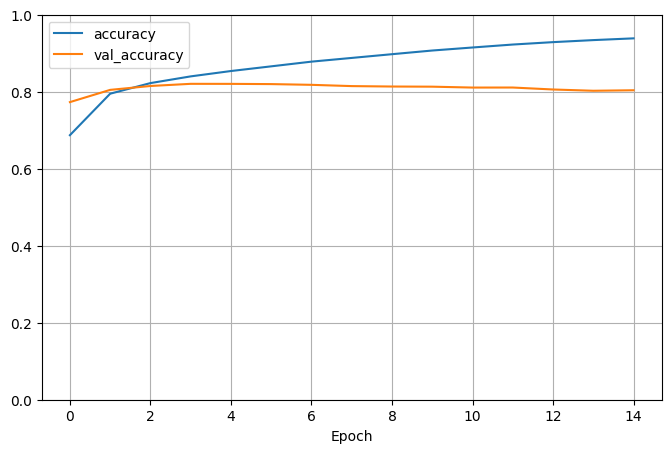

In [73]:
# Calculate inference time
start_time_MLP = time.time()
best_pre_MLP = best_MLP.predict(MLP_X_test)
end_time_MLP = time.time()
inference_time_MLP = end_time_MLP - start_time_MLP

# Convert predicted probabilities to class labels
best_pre_MLP = np.argmax(best_pre_MLP, axis=1)

accuracy_best_model_MLP = accuracy_score(MLP_y_test, best_pre_MLP)
precision_best_model_MLP = precision_score(MLP_y_test, best_pre_MLP, average="macro", zero_division=0)
recall_best_model_MLP = recall_score(MLP_y_test, best_pre_MLP, average="macro")
conf_matrix_best_model_MLP = confusion_matrix(MLP_y_test, best_pre_MLP)
f1_best_model_MLP = f1_score(MLP_y_test, best_pre_MLP, average="macro")

print(f"Best Model MLP Accuracy: {accuracy_best_model_MLP:.4f}")
print(f"Best Model MLP Precision: {precision_best_model_MLP:.4f}")
print(f"Best Model MLP Recall: {recall_best_model_MLP:.4f}")
print(f"Best Model MLP Confusion Matrix: {conf_matrix_best_model_MLP:}")
print(f"Best Model MLP F1 Score: {f1_best_model_MLP:.4f}")



mse_best_model_MLP = mean_squared_error(MLP_y_test, best_pre_MLP)
print(f"Mean Square Error: {mse_best_model_MLP:.2f}")

silhouette_avg_best_model_MLP = silhouette_score(MLP_y_test.reshape(MLP_y_test.shape[0], -1), best_pre_MLP)
print(f"Silhouette Coefficient: {silhouette_avg_best_model_MLP:.2f}")

print(f"Training Time: {training_time_MLP:.2f} seconds")
print(f"Inference Time: {inference_time_MLP:.2f} seconds")


# set figure size
plt.figure(figsize=(12,5))
# Convert the history dictionary to a Pandas dataframe and extract the accuracies
accuracies = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]
# Plot the accuracies
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

# # Evaluate the classifier on the test

## **Comparison**

We get the accuracy of each model, the LSTM is 0.8363, the CNN is 0.8291, and the best MLP is 0.8094.

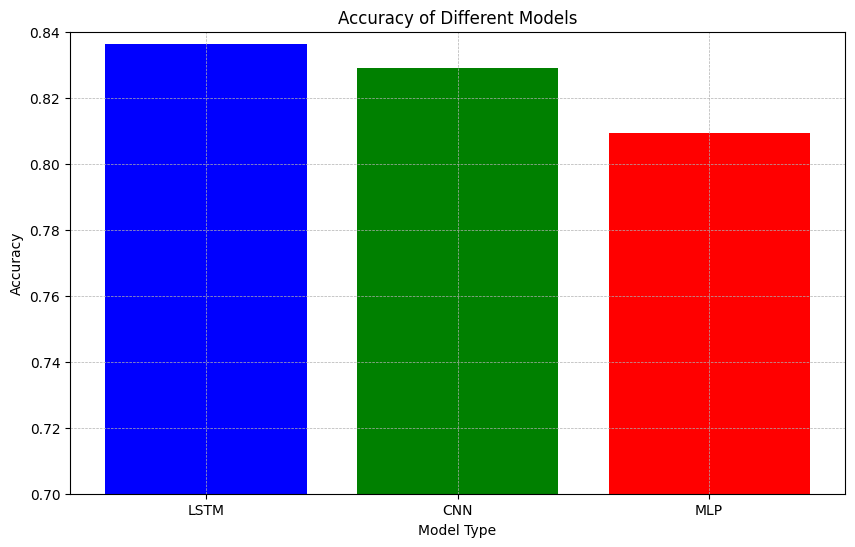

In [92]:
models = ['LSTM', 'CNN', 'MLP']
data = [0.8363, 0.8291, 0.8094]

# Using the method to plot the accuracies
plot_model_compare(models, data, "Accuracy")

We also try to compare precsion, re-call, and F1-score of each model

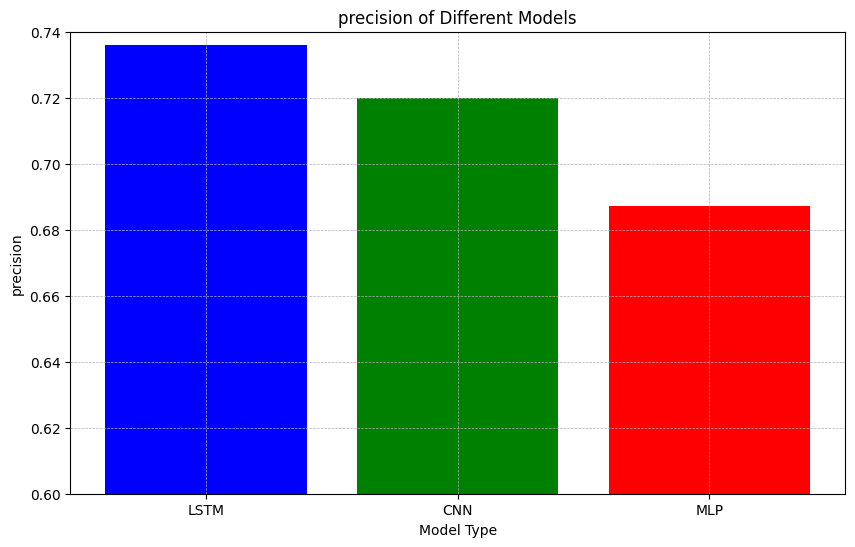

In [80]:
#precision
models = ['LSTM', 'CNN', 'MLP']
data = [0.7360, 0.7199, 0.6872]

# Using the method to plot the precision
plot_model_compare(models, data, "precision")

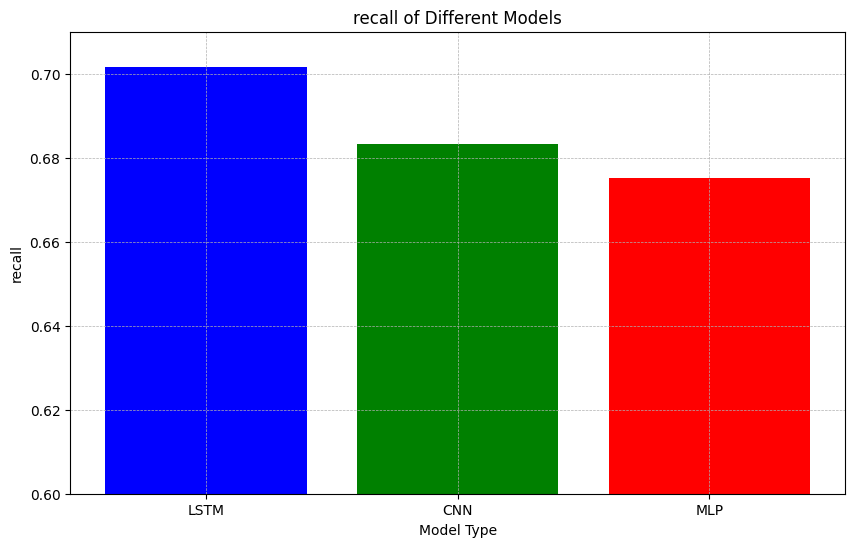

In [81]:
#Recall
models = ['LSTM', 'CNN', 'MLP']
data = [0.7016, 0.6833, 0.6751]

# Using the method to plot the recall
plot_model_compare(models, data, "recall")

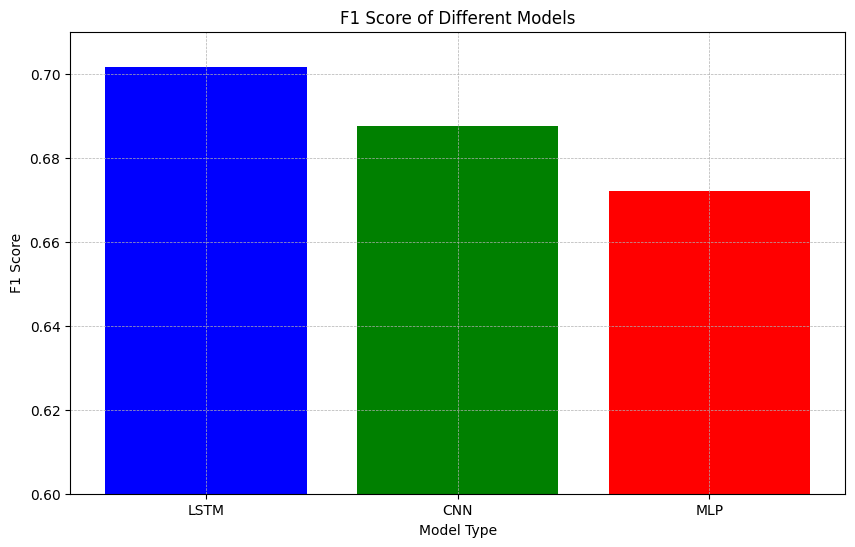

In [84]:
#F1 Score
models = ['LSTM', 'CNN', 'MLP']
data = [0.7016, 0.6876, 0.6720]

# Using the method to plot the F1 score
plot_model_compare(models, data, "F1 Score")


We also compare the training time and inferencing time of each model.

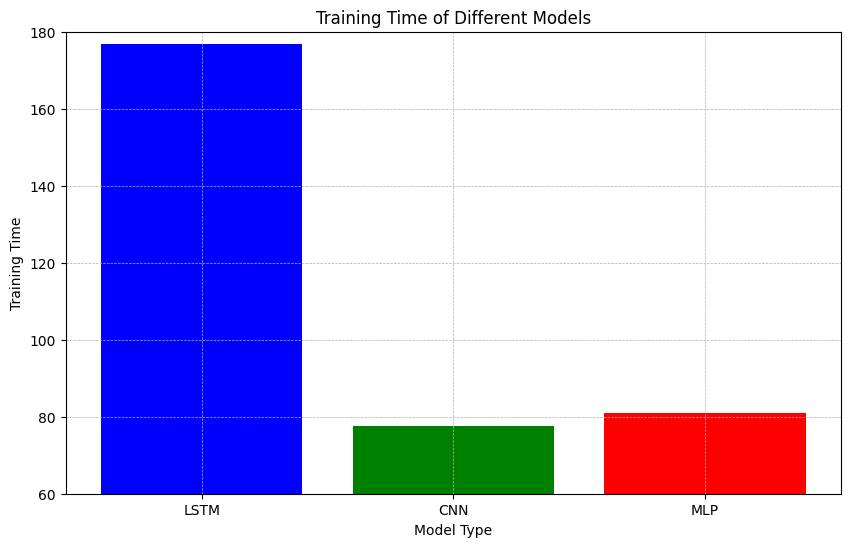

In [93]:
#Training Time
models = ['LSTM', 'CNN', 'MLP']
data = [176.85, 77.60, 80.88]

# Using the method to plot the Training Time
plot_model_compare(models, data, "Training Time")

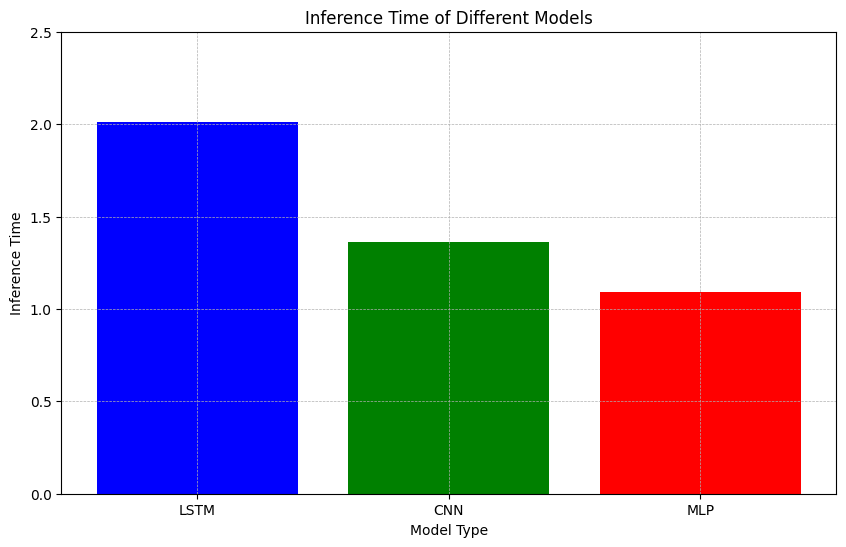

In [96]:
#Inference Time
models = ['LSTM', 'CNN', 'MLP']
data = [2.01, 1.36, 1.09]

# Using the method to plot the Inference Time
plot_model_compare(models, data, "Inference Time")

## **The best classifier**

Apparantly, Model1, which is LSTM, is the best model as it has the highest accuracy. Evaluation metrics of Model1 is shown below:

In [ ]:
print(f"Best Model 1 Accuracy: {accuracy_best_model_1:.4f}")
print(f"Best Model 1 Precision: {precision_best_model_1:.4f}")
print(f"Best Model 1 Recall: {recall_best_model_1:.4f}")
print(f"Best Model 1 Confusion Matrix: {conf_matrix_best_model_1:}")
print(f"Best Model 1 F1 Score: {f1_best_model_1:.4f}")

print(f"Training Time: {training_time:.2f} seconds")
print(f"Inference Time: {inference_time:.2f} seconds")

Best Model 1 Accuracy: 0.8363
Best Model 1 Precision: 0.7247
Best Model 1 Recall: 0.6965
Best Model 1 Confusion Matrix: [[774   0   0 ...   0   0   0]
 [  0 910   0 ...   0   0   0]
 [  0   1 964 ...   0   0   4]
 ...
 [  0   0   1 ...  62   0   0]
 [  0   0   0 ...   0  20   0]
 [  0   0  18 ...   1   0  33]]
Best Model 1 F1 Score: 0.6997
Training Time: 168.98 seconds
Inference Time: 1.82 seconds


Moreover, we can find that F1 score, recall, precsion of LSTM are all the highest, which means that it can be suitable for all requirement.
However, the trainning time and inferencing time of it is very high compare to other models.